<a href="https://colab.research.google.com/github/addy8403/pro1/blob/main/ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


--------------------------------------------------------------------------------

**PROJECT - MACHINE LEARNING FOR SUSTAINABLE DEVELOPMENT GOALS (SDGs)**
--------------------------------------------------------------------------------





In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn.metrics import classification_report
import random
from collections import Counter

# **_1. Preprocessing of Dataset_**

In [ ]:
#importing dataset
df = pd.read_csv('Carbon Emissions.csv')
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


<Axes: >

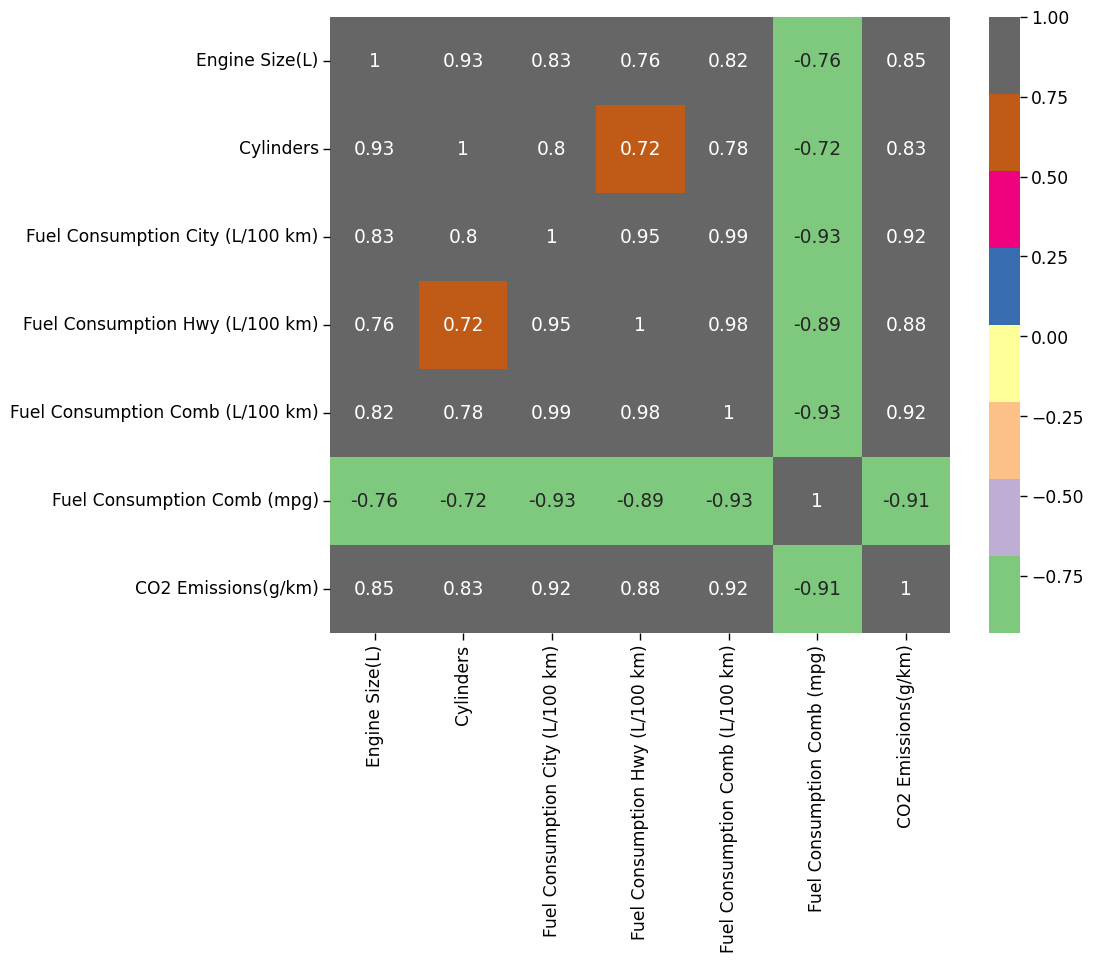

In [ ]:
numerical_columns = df.select_dtypes(include=[int, float])
plt.figure(figsize=(10,8))
sns.set_context('paper', font_scale=1.4)
sns.heatmap(numerical_columns.corr(), annot=True, cmap='Accent')

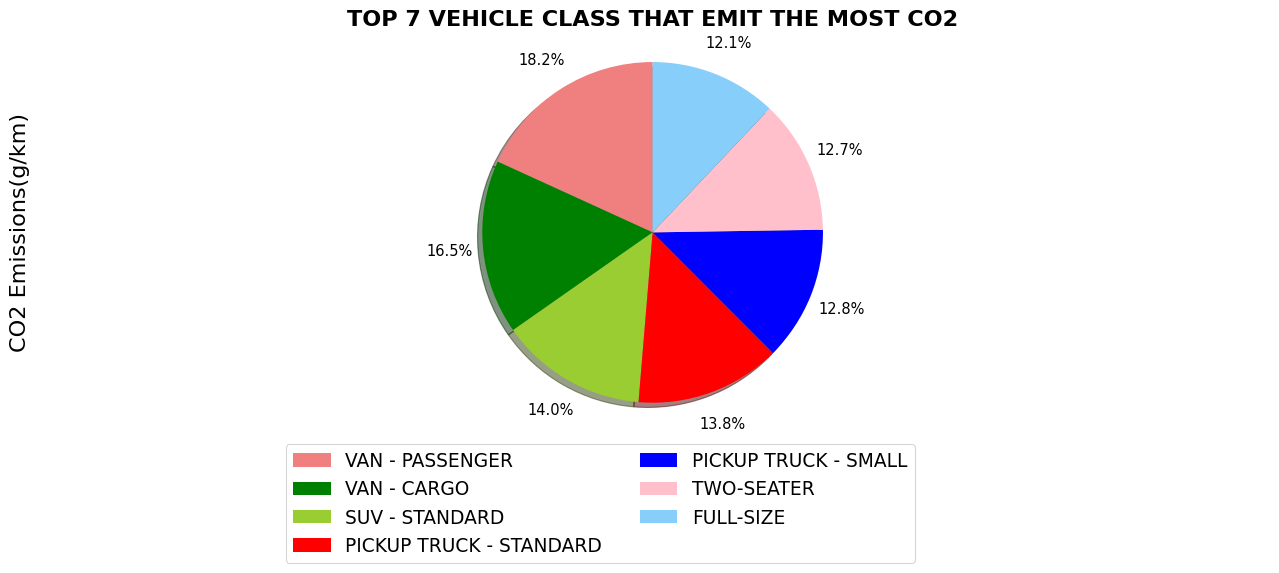

In [ ]:
df1 = df.groupby(["Vehicle Class"])[["CO2 Emissions(g/km)"]].mean().sort_values("CO2 Emissions(g/km)", ascending = False)
df1["CO2 Emissions(g/km)"].head(7).plot(kind = "pie",
                                       figsize = (13, 6),
                                       colors = ["lightcoral", "green", "yellowgreen", "red", "blue", "pink", "lightskyblue"],
                                       shadow = True, explode = [0, 0, 0, 0, 0, 0, 0],
                                       autopct = "%.1f%%", textprops = {"fontsize":10.5} ,
                                       labels = None, startangle = 90,
                                       pctdistance = 1.2)
plt.title("TOP 7 VEHICLE CLASS THAT EMIT THE MOST CO2", fontsize = "large", fontweight = "bold", y = 1.03)
plt.legend(df1.index, ncol = 2, loc = "best", bbox_to_anchor=(0.72, -0.04), fontsize = 'medium')
plt.ylabel("CO2 Emissions(g/km)", fontsize = "large")

plt.axis("equal")
plt.tight_layout()
plt.show()

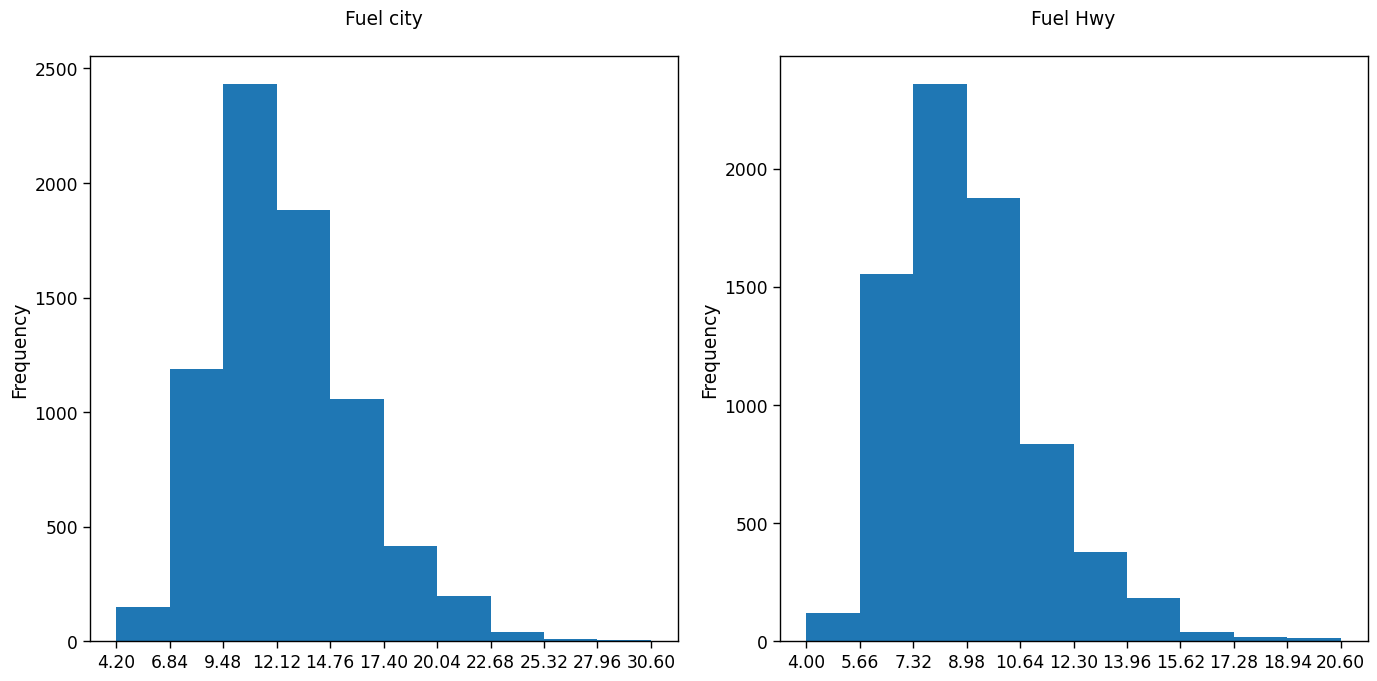

In [ ]:
count, bins_edge1 = np.histogram(df["Fuel Consumption City (L/100 km)"])
count, bins_edge2 = np.histogram(df["Fuel Consumption Hwy (L/100 km)"])

fig = plt.figure(figsize = (14,7))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

df["Fuel Consumption City (L/100 km)"].plot(kind = "hist", xticks = bins_edge1, ax = ax1)
ax1.set_title("Fuel city", y = 1.04)

df["Fuel Consumption Hwy (L/100 km)"].plot(kind = "hist", xticks = bins_edge2 ,ax = ax2)
ax2.set_title("Fuel Hwy", y = 1.04)

plt.tight_layout()
plt.show()

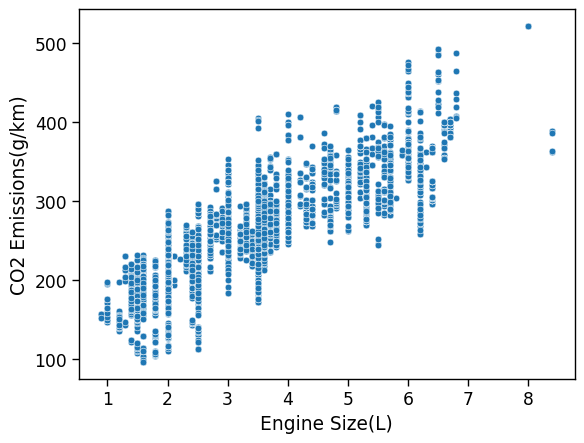

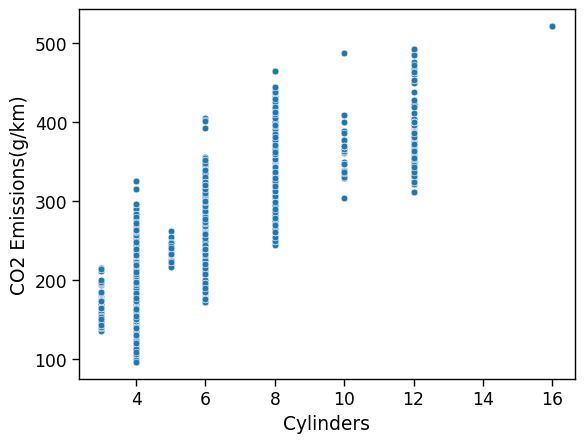

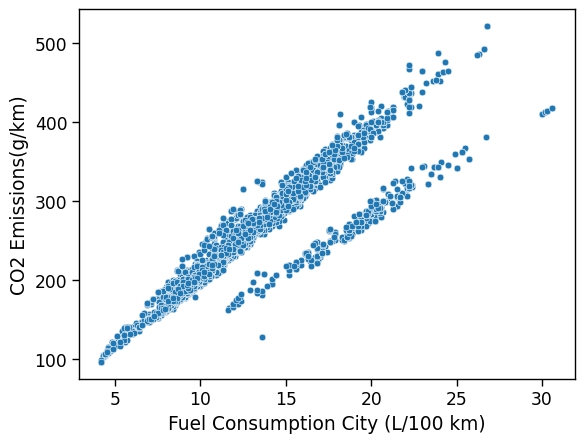

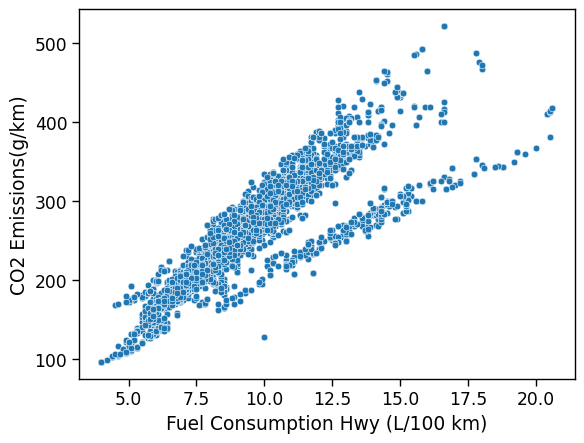

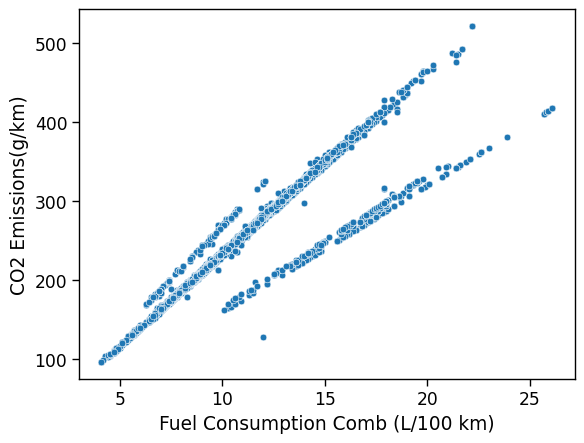

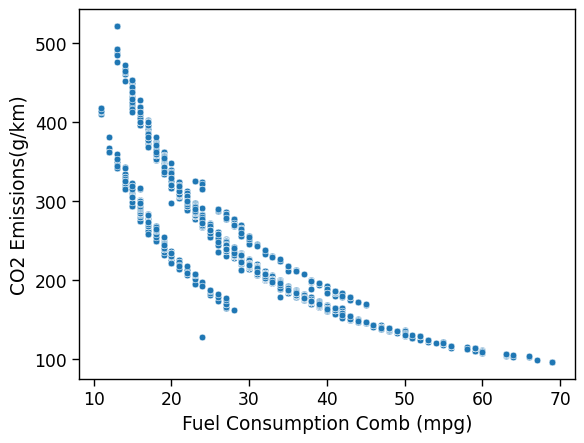

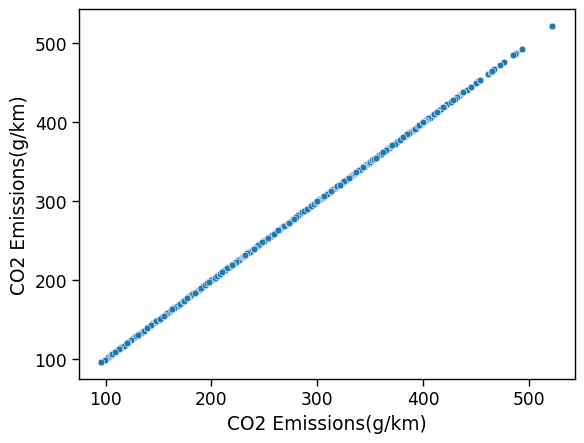

In [ ]:
for feature in df.select_dtypes('number').columns:
  sns.scatterplot(x=feature, y="CO2 Emissions(g/km)", data=df);
  plt.show()

In [ ]:
gear_type = {'A','AS','AM','AV','M'}
gear_count = {'3','4','5','6','7','8','9','10'}
transmission = set()
for i in gear_type:
  for j in gear_count:
    transmission.add(i+j)
for u in df['Transmission']:
  transmission.add(u)

In [ ]:
gear_dict = {}
for  u in transmission:
  gear_dict[u] = 0
print(gear_dict)
gear_dict_list = []
for i in range(0,len(df.index)):
  gear_dict_list.append(gear_dict)
len(gear_dict_list)

{'AS3': 0, 'AV7': 0, 'A9': 0, 'M4': 0, 'AV6': 0, 'AV5': 0, 'AM8': 0, 'A4': 0, 'A3': 0, 'AM9': 0, 'M5': 0, 'A7': 0, 'M8': 0, 'M6': 0, 'A5': 0, 'AS5': 0, 'AV': 0, 'AM7': 0, 'A6': 0, 'AV10': 0, 'AV3': 0, 'AS8': 0, 'AS6': 0, 'A10': 0, 'AV9': 0, 'AM5': 0, 'AS4': 0, 'A8': 0, 'AM10': 0, 'AS9': 0, 'AM3': 0, 'M9': 0, 'AM6': 0, 'AM4': 0, 'AS10': 0, 'AS7': 0, 'AV8': 0, 'M10': 0, 'AV4': 0, 'M3': 0, 'M7': 0}


7385

In [ ]:
gearDF = pd.DataFrame.from_dict(gear_dict_list)

In [ ]:
df = pd.concat([df,gearDF ], axis=1)
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),...,M9,AM6,AM4,AS10,AS7,AV8,M10,AV4,M3,M7
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,...,0,0,0,0,0,0,0,0,0,0
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,...,0,0,0,0,0,0,0,0,0,0
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,...,0,0,0,0,0,0,0,0,0,0
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,...,0,0,0,0,0,0,0,0,0,0
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
for index,row in df.iterrows():
  df.at[index,row['Transmission']]=1

In [ ]:
df_no_fuel = df.copy()

In [ ]:
df_no_fuel = df_no_fuel.drop(['Fuel Consumption City (L/100 km)'],axis=1)
df_no_fuel = df_no_fuel.drop(['Fuel Consumption Hwy (L/100 km)'],axis=1)
df_no_fuel = df_no_fuel.drop(['Fuel Consumption Comb (L/100 km)'],axis=1)
df_no_fuel = df_no_fuel.drop(['Fuel Consumption Comb (mpg)'],axis=1)

In [ ]:
df_cat = df[['Make','Vehicle Class','Fuel Type','Transmission']]

In [ ]:
df_cat = pd.get_dummies(df_cat, columns = ['Make', 'Vehicle Class','Fuel Type'])
df_cat.head()

,Transmission,Make_ACURA,Make_ALFA ROMEO,Make_ASTON MARTIN,Make_AUDI,Make_BENTLEY,Make_BMW,Make_BUGATTI,Make_BUICK,Make_CADILLAC,...,Vehicle Class_SUV - SMALL,Vehicle Class_SUV - STANDARD,Vehicle Class_TWO-SEATER,Vehicle Class_VAN - CARGO,Vehicle Class_VAN - PASSENGER,Fuel Type_D,Fuel Type_E,Fuel Type_N,Fuel Type_X,Fuel Type_Z
0,AS5,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,M6,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,AV7,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,AS6,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
4,AS6,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1


In [ ]:
df_cat = pd.concat([df_cat,gearDF ], axis=1)
df_cat.head()

,Transmission,Make_ACURA,Make_ALFA ROMEO,Make_ASTON MARTIN,Make_AUDI,Make_BENTLEY,Make_BMW,Make_BUGATTI,Make_BUICK,Make_CADILLAC,...,M9,AM6,AM4,AS10,AS7,AV8,M10,AV4,M3,M7
0,AS5,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,M6,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,AV7,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,AS6,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,AS6,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
for index,row in df_cat.iterrows():
  df_cat.at[index,row['Transmission']]=1

In [ ]:
df_cat = df_cat.drop(['Transmission'],axis=1)

In [ ]:
df = df.drop(['Transmission'],axis=1)

In [ ]:
def normalize(df,column):
    df[column] = (df[column]-df[column].mean())/df[column].std()
    return df

In [ ]:
car_models = df['Model'].to_numpy()
df = df.drop(['Model'],axis=1)

In [ ]:
df = normalize(df,'Cylinders')
df = normalize(df,'Fuel Consumption City (L/100 km)')
df = normalize(df,'Fuel Consumption Hwy (L/100 km)')
df = normalize(df,'Fuel Consumption Comb (L/100 km)')
df = normalize(df,'Fuel Consumption Comb (mpg)')
df = normalize(df,'Engine Size(L)')
df = normalize(df,'CO2 Emissions(g/km)')

In [ ]:
def percentileDivision(df):

  first_quartile = df['CO2 Emissions(g/km)'].quantile(0.25)
  third_quartile = df['CO2 Emissions(g/km)'].quantile(0.75)


  def classify_emissions(emission):
      if emission < first_quartile:
          return 1
      elif first_quartile <= emission <= third_quartile:
          return 2
      else:
          return 3


  df['Target'] = df['CO2 Emissions(g/km)'].apply(classify_emissions)
  return df

In [ ]:
df = percentileDivision(df)

In [ ]:
df.drop('CO2 Emissions(g/km)', axis = 1)

,Make,Vehicle Class,Engine Size(L),Cylinders,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),AS3,...,AM6,AM4,AS10,AS7,AV8,M10,AV4,M3,M7,Target
0,ACURA,COMPACT,-0.856663,-0.883348,Z,-0.758950,-1.052709,-0.855684,0.763059,0,...,0,0,0,0,0,0,0,0,0,1
1,ACURA,COMPACT,-0.561279,-0.883348,Z,-0.387551,-0.603161,-0.475391,0.209952,0,...,0,0,0,0,0,0,0,0,0,2
2,ACURA,COMPACT,-1.225893,-0.883348,Z,-1.873149,-1.457303,-1.754558,2.837208,0,...,0,0,0,0,0,0,0,0,0,1
3,ACURA,SUV - SMALL,0.251026,0.210561,Z,0.040987,0.026206,0.043191,-0.343155,0,...,0,0,0,0,0,0,0,0,0,2
4,ACURA,SUV - SMALL,0.251026,0.210561,Z,-0.130428,-0.153613,-0.129670,-0.066601,0,...,0,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7380,VOLVO,SUV - SMALL,-0.856663,-0.883348,Z,-0.530397,-0.603161,-0.544535,0.348229,0,...,0,0,0,0,0,0,0,0,0,2
7381,VOLVO,SUV - SMALL,-0.856663,-0.883348,Z,-0.387551,-0.333433,-0.371675,0.209952,0,...,0,0,0,0,0,0,0,0,0,2
7382,VOLVO,SUV - SMALL,-0.856663,-0.883348,Z,-0.244705,-0.198568,-0.233386,-0.066601,0,...,0,0,0,0,0,0,0,0,0,2
7383,VOLVO,SUV - STANDARD,-0.856663,-0.883348,Z,-0.387551,-0.333433,-0.371675,0.209952,0,...,0,0,0,0,0,0,0,0,0,2


In [ ]:
df_num = df[['Cylinders','Fuel Consumption City (L/100 km)','Fuel Consumption Hwy (L/100 km)','Fuel Consumption Comb (L/100 km)','Fuel Consumption Comb (mpg)','Engine Size(L)']]

In [ ]:
def chiSquareTest(df_cat,df):
  from scipy.stats import chi2_contingency

  p_values = {}

  target_col = df['Target']
  significance_level = 0.0005
  for col in df_cat.columns:
      contingency_table = pd.crosstab(df_cat[col], target_col)
      chi2, p, _, _ = chi2_contingency(contingency_table)
      p_values[col] = p

  selected_features = [feature for feature, p_val in p_values.items() if p_val < significance_level]

  len(selected_features)
  return selected_features,target_col

In [ ]:
selected_features,target = chiSquareTest(df_cat,df)
df_cat = df_cat[selected_features]
df_cat.head()

,Make_ACURA,Make_ASTON MARTIN,Make_AUDI,Make_BENTLEY,Make_BMW,Make_BUICK,Make_CADILLAC,Make_CHEVROLET,Make_CHRYSLER,Make_DODGE,...,A6,AS8,AS6,A10,A8,AS9,AM6,AS10,AS7,M7
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [ ]:
df = pd.concat([df_cat,df_num], axis=1)

In [ ]:
def PCA(df):

  centered_data = df - df.mean()

  covariance_matrix = centered_data.cov()

  eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

  total_variance = sum(eigenvalues)
  explained_variance = [(i / total_variance) * 100 for i in sorted(eigenvalues, reverse=True)]
  cumulative_variance = np.cumsum(explained_variance)

  n_components = np.argmax(cumulative_variance >= 95) + 1

  sorted_eigenvalues = eigenvalues.argsort()[::-1]
  eigenvectors = eigenvectors[:, sorted_eigenvalues]
  selected_eigenvectors = eigenvectors[:, :n_components]

  transformed_data = np.dot(centered_data, selected_eigenvectors)

  print("Original shape:", centered_data.shape)
  print("Transformed shape:", transformed_data.shape)
  return transformed_data


In [ ]:
transformed_data_fuel = PCA(df)

Original shape: (7385, 80)
Transformed shape: (7385, 35)


In [ ]:
df_cat_no_fuel = df_no_fuel[['Make','Vehicle Class','Fuel Type','Transmission']]

In [ ]:
df_cat_no_fuel = pd.get_dummies(df_cat_no_fuel, columns = ['Make', 'Vehicle Class','Fuel Type'])
df_cat_no_fuel.head()

,Transmission,Make_ACURA,Make_ALFA ROMEO,Make_ASTON MARTIN,Make_AUDI,Make_BENTLEY,Make_BMW,Make_BUGATTI,Make_BUICK,Make_CADILLAC,...,Vehicle Class_SUV - SMALL,Vehicle Class_SUV - STANDARD,Vehicle Class_TWO-SEATER,Vehicle Class_VAN - CARGO,Vehicle Class_VAN - PASSENGER,Fuel Type_D,Fuel Type_E,Fuel Type_N,Fuel Type_X,Fuel Type_Z
0,AS5,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,M6,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,AV7,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,AS6,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
4,AS6,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1


In [ ]:
df_cat_no_fuel = pd.concat([df_cat_no_fuel,gearDF ], axis=1)
df_cat_no_fuel.head()

,Transmission,Make_ACURA,Make_ALFA ROMEO,Make_ASTON MARTIN,Make_AUDI,Make_BENTLEY,Make_BMW,Make_BUGATTI,Make_BUICK,Make_CADILLAC,...,M9,AM6,AM4,AS10,AS7,AV8,M10,AV4,M3,M7
0,AS5,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,M6,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,AV7,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,AS6,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,AS6,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
for index,row in df_cat_no_fuel.iterrows():
  df_cat_no_fuel.at[index,row['Transmission']]=1

In [ ]:
df_cat_no_fuel = df_cat_no_fuel.drop(['Transmission'],axis=1)

In [ ]:
df_no_fuel = df_no_fuel.drop(['Transmission'],axis=1)

In [ ]:
df_no_fuel = df_no_fuel.drop(['Model'],axis=1)

In [ ]:
df_no_fuel = normalize(df_no_fuel,'Cylinders')
df_no_fuel = normalize(df_no_fuel,'Engine Size(L)')
df_no_fuel = normalize(df_no_fuel,'CO2 Emissions(g/km)')

In [ ]:
df_no_fuel = percentileDivision(df_no_fuel)

In [ ]:
df_no_fuel = df_no_fuel.drop('CO2 Emissions(g/km)', axis = 1)

In [ ]:
df_num_no_fuel = df_no_fuel[['Cylinders','Engine Size(L)']]

In [ ]:
selected_features_no_fuel,_ = chiSquareTest(df_cat_no_fuel,df_no_fuel)
df_cat_no_fuel = df_cat_no_fuel[selected_features_no_fuel]
df_cat_no_fuel.head()

,Make_ACURA,Make_ASTON MARTIN,Make_AUDI,Make_BENTLEY,Make_BMW,Make_BUICK,Make_CADILLAC,Make_CHEVROLET,Make_CHRYSLER,Make_DODGE,...,A6,AS8,AS6,A10,A8,AS9,AM6,AS10,AS7,M7
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [ ]:
df_no_fuel = pd.concat([df_cat_no_fuel,df_num_no_fuel], axis=1)

In [ ]:
df_no_fuel.head()

,Make_ACURA,Make_ASTON MARTIN,Make_AUDI,Make_BENTLEY,Make_BMW,Make_BUICK,Make_CADILLAC,Make_CHEVROLET,Make_CHRYSLER,Make_DODGE,...,AS6,A10,A8,AS9,AM6,AS10,AS7,M7,Cylinders,Engine Size(L)
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-0.883348,-0.856663
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-0.883348,-0.561279
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-0.883348,-1.225893
3,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0.210561,0.251026
4,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0.210561,0.251026


In [ ]:
transformed_data_no_fuel = PCA(df_no_fuel)


Original shape: (7385, 76)
Transformed shape: (7385, 43)


In [ ]:
target_arr = target.to_numpy()
target_arr = target_arr.reshape((target_arr.shape[0],1))

In [ ]:
transformed_data_fuel = np.concatenate((transformed_data_fuel, target_arr), axis = 1)
transformed_data_no_fuel = np.concatenate((transformed_data_no_fuel, target_arr), axis = 1)

In [ ]:
print(transformed_data_fuel.shape,transformed_data_no_fuel.shape)

(7385, 36) (7385, 44)


In [ ]:
split = int(0.75*transformed_data_fuel.shape[0])
training_data_fuel, test_data_fuel = transformed_data_fuel[:split,:], transformed_data_fuel[split:,:]
car_models = car_models[split:]
print(training_data_fuel.shape,test_data_fuel.shape)

(5538, 36) (1847, 36)


In [ ]:
car_models.shape

(1847,)

In [ ]:
split = int(0.75*transformed_data_fuel.shape[0])
training_data_no_fuel, test_data_no_fuel = transformed_data_no_fuel[:split,:], transformed_data_no_fuel[split:,:]
print(training_data_no_fuel.shape,test_data_no_fuel.shape)

(5538, 44) (1847, 44)


In [ ]:
df_only_fuel = df[['Fuel Consumption City (L/100 km)','Fuel Consumption Hwy (L/100 km)','Fuel Consumption Comb (L/100 km)','Fuel Consumption Comb (mpg)']]
only_fuel_data = df_only_fuel.to_numpy()
split = int(0.75*only_fuel_data.shape[0])
training_data_only_fuel, test_data_only_fuel = only_fuel_data[:split,:], only_fuel_data[split:,:]
print(training_data_no_fuel.shape,test_data_no_fuel.shape)

(5538, 44) (1847, 44)


# ***2. Artificial Neural Networks (Multi-layered Perceptron)***

A **Multi-Layer Perceptron (MLP)** is a type of artificial neural network that consists of multiple layers of interconnected nodes, also known as neurons or perceptrons. It is a feedforward neural network, meaning that information flows through the network in one direction—from the input layer through the hidden layers to the output layer.


**Structure of an MLP:**

* **Input Layer**: The first layer of the network, where each
node represents an input feature.

* **Hidden Layers**: Layers between the input and output layers. Each node in a hidden layer receives input from the nodes in the previous layer and passes its output to the nodes in the next layer.

* **Output Layer**: The final layer that produces the network's output.


1. **Input Layer:**  $ x_i$


2. **Hidden Layers:**

   $ z_j^l = \sum_{k=1}^{n^{l-1}} w_{jk}^l a_k^{l-1} + b_j^l $

   $ a_j^l = \sigma(z_j^l) $
    *   $n^{l-1}$  : is the number of neurons in the previous layer.
    *   $w_{jk}^l$  :  is the weight between $k$th neuron in layer $l$ - 1 and the $j$th neuron in layer $l$

    *   $a_k^{l-1}$  : output of $k$th neuron in layer $l$ - 1
    *   $b_j^l$  : bias term for $j$th neuron in layer l



3. **Activation Function:**

    $ a_j^l = \sigma(z_j^l) $


4. **Backward Pass (Backpropagation):**

    * The network is trained by adjusting the weights and biases based on the error between the predicted output and the actual target. The backpropagation algorithm is used to update the weights and biases.

    * The error $E$ for a given example is computed using a loss function (e.g., mean squared error or cross-entropy)

    * In our model we have used cross entropy error, which is also known as log loss error since its a classification problem.

      $\ E = -\sum_{i=1}^{n_{\text{output}}} \left( y_i \log(\hat{y_i}) + (1 - y_i) \log(1 - \hat{y_i}) \right) \$

    * Modified Error Term:
$\delta_j^L = \frac{\partial E}{\partial z_j^L} = \hat{y_j} - y_j $
    
      * Where :
        * ${n_{\text{output}}}$ is the number of neurons in output layer
        * $y_i$ is the actual output
        * $\hat{y_i}$ is the predicted output

   * Weight Update Rule:

      * $ \Delta w_{jk}^L = -\eta \delta_j^L a_k^{L-1} $
      *  $ \Delta b_j^L = -\eta \delta_j^L $

      Here: $\eta$ is the leanring rate.

  * **Output Layer:**

    * $t_i = \sum_{j=1}^{n^L} w_{ij}^L a_j^L + b_i^L $
    * $\hat{y_i} = \sigma(t_i) $
    

  * This process is repeated for each layer, propagating the error backward through the network. The weights and biases are updated iteratively until the network converges to a satisfactory solution.





In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
class MLP:
    def __init__(self, input_size, hidden_size, output_size):
        self.weights_hidden = np.random.randn(input_size, hidden_size)
        self.bias_hidden = np.zeros((1, hidden_size))
        self.weights_output = np.random.randn(hidden_size, output_size)
        self.bias_output = np.zeros((1, output_size))

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def softmax(self, x):
        exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
        return exp_x / np.sum(exp_x, axis=1, keepdims=True)

    def forward(self, X):

        hidden_input = np.dot(X, self.weights_hidden) + self.bias_hidden
        hidden_output = self.sigmoid(hidden_input)

        output_input = np.dot(hidden_output, self.weights_output) + self.bias_output
        output_prob = self.softmax(output_input)

        return hidden_output, output_prob

    def compute_loss(self, y_true, y_pred):
        epsilon = 1e-15  # Small constant to avoid log(0)
        y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
        loss = -np.sum(y_true * np.log(y_pred)) / len(y_true)
        return loss

    def backward(self, X, y_true, learning_rate):
        hidden_output, output_prob = self.forward(X)

        error_output = output_prob - y_true
        grad_weights_output = np.dot(hidden_output.T, error_output)
        grad_bias_output = np.sum(error_output, axis=0, keepdims=True)

        error_hidden = np.dot(error_output, self.weights_output.T) * hidden_output * (1 - hidden_output)
        grad_weights_hidden = np.dot(X.T, error_hidden)
        grad_bias_hidden = np.sum(error_hidden, axis=0, keepdims=True)

        self.weights_hidden -= learning_rate * grad_weights_hidden
        self.bias_hidden -= learning_rate * grad_bias_hidden
        self.weights_output -= learning_rate * grad_weights_output
        self.bias_output -= learning_rate * grad_bias_output

    def accuracy(self, y_true, y_pred):
        correct_predictions = np.sum(y_true == y_pred)
        total_samples = len(y_true)
        accuracy = correct_predictions / total_samples
        return accuracy

    def train(self, X, y, epochs, batch_size, learning_rate):
        y_one_hot = np.eye(len(np.unique(y)))[y]

        for epoch in range(epochs):
            indices = np.arange(len(X))
            np.random.shuffle(indices)
            X_shuffled = X[indices]
            y_shuffled = y_one_hot[indices]

            for i in range(0, len(X), batch_size):
                X_batch = X_shuffled[i:i + batch_size]
                y_batch = y_shuffled[i:i + batch_size]

                self.backward(X_batch, y_batch, learning_rate)

            _, output_prob = self.forward(X)
            loss = self.compute_loss(y_one_hot, output_prob)
            predictions = np.argmax(output_prob, axis=1)
            acc_train = self.accuracy(y, predictions)
            print(f"Epoch {epoch + 1}/{epochs}, Loss: {loss}, Training Accuracy: {acc_train}")

    def predict(self, X)
        _, output_prob = self.forward(X)
        return np.argmax(output_prob, axis=1)


In [ ]:
accuracy_arr_w_f = []
accuracy_arr_n_f = []
accuracy_arr_o_f = []
prediction_fuel_mlp = []
prediction_no_fuel_mlp = []
prediction_only_fuel_mlp = []
size_arr = [1, 2, 5, 10]

In [ ]:
# with fuel


X_train = training_data_fuel[:, :-1]
y_train = training_data_fuel[:,-1].astype(int) - 1
X_test = test_data_fuel[:, :-1]
y_test = test_data_fuel[:,-1].astype(int) - 1

for size in size_arr:
    input_size = X_train.shape[1]
    hidden_size = size
    output_size = 3  # Three classes
    mlp1 = MLP(input_size, hidden_size, output_size)


    mlp1.train(X_train, y_train, epochs=100, batch_size=32, learning_rate=0.01)


    y_pred = mlp1.predict(X_test)


    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy}")

    accuracy_arr_w_f.append(accuracy)
    prediction_fuel_mlp.append(y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
    print(f"Precision: {precision}")


    recall = recall_score(y_test, y_pred, average='weighted', zero_division=1)
    print(f"Recall: {recall}")


    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=1)
    print(f"F1 Score: {f1}")


    conf_matrix = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(conf_matrix)

report_fuel = classification_report(y_test, prediction_fuel_mlp[len(prediction_fuel_mlp)-1])

In [ ]:
# without fuel


X_train = training_data_no_fuel[:, :-1]
y_train = training_data_no_fuel[:,-1].astype(int) - 1
X_test = test_data_no_fuel[:, :-1]
y_test = test_data_no_fuel[:,-1].astype(int) - 1

for size in size_arr:

    input_size = X_train.shape[1]
    hidden_size = size
    output_size = 3
    mlp2 = MLP(input_size, hidden_size, output_size)

    mlp2.train(X_train, y_train, epochs=100, batch_size=32, learning_rate=0.01)


    y_pred = mlp2.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy}")

    accuracy_arr_n_f.append(accuracy)
    prediction_no_fuel_mlp.append(y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
    print(f"Precision: {precision}")


    recall = recall_score(y_test, y_pred, average='weighted', zero_division=1)
    print(f"Recall: {recall}")


    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=1)
    print(f"F1 Score: {f1}")


    conf_matrix = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(conf_matrix)

report_no_fuel = classification_report(y_test, prediction_no_fuel_mlp[len(prediction_no_fuel_mlp)-1])

In [ ]:
# only fuel


only_fuel_data_copy = np.concatenate((only_fuel_data, target_arr), axis = 1)
split = int(0.75*only_fuel_data_copy.shape[0])
training_data_only_fuel_copy, test_data_only_fuel_copy = only_fuel_data_copy[:split,:], only_fuel_data_copy[split:,:]
print(training_data_no_fuel.shape,test_data_no_fuel.shape)
X_train = training_data_only_fuel_copy[:, :-1]
y_train = training_data_only_fuel_copy[:,-1].astype(int) - 1
X_test = test_data_only_fuel_copy[:, :-1]
y_test = test_data_only_fuel_copy[:,-1].astype(int) - 1


for size in size_arr:
    input_size = X_train.shape[1]
    hidden_size = size
    output_size = 3
    mlp3 = MLP(input_size, hidden_size, output_size)


    mlp3.train(X_train, y_train, epochs=100, batch_size=32, learning_rate=0.01)


    y_pred = mlp3.predict(X_test)


    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy}")

    accuracy_arr_o_f.append(accuracy)
    prediction_only_fuel_mlp.append(y_pred)

    precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
    print(f"Precision: {precision}")


    recall = recall_score(y_test, y_pred, average='weighted', zero_division=1)
    print(f"Recall: {recall}")


    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=1)
    print(f"F1 Score: {f1}")


    conf_matrix = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(conf_matrix)

report_only_fuel = classification_report(y_test, prediction_only_fuel_mlp[len(prediction_only_fuel_mlp)-1])

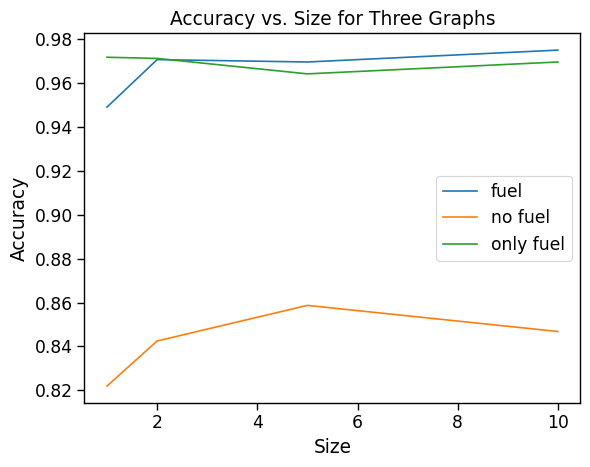

In [ ]:
plt.plot(size_arr, accuracy_arr_w_f , label='fuel')
plt.plot(size_arr, accuracy_arr_n_f , label='no fuel')
plt.plot(size_arr, accuracy_arr_o_f , label='only fuel')

plt.xlabel('Size')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Size for Three Graphs')
plt.legend()

plt.show()

In [ ]:
print(report_fuel)

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       425
           1       0.96      0.99      0.98       926
           2       1.00      0.94      0.97       496

    accuracy                           0.98      1847
   macro avg       0.98      0.97      0.98      1847
weighted avg       0.98      0.98      0.98      1847



In [ ]:
print(report_no_fuel)

              precision    recall  f1-score   support

           0       0.83      0.86      0.85       425
           1       0.82      0.90      0.85       926
           2       0.94      0.74      0.83       496

    accuracy                           0.85      1847
   macro avg       0.86      0.83      0.84      1847
weighted avg       0.85      0.85      0.85      1847



In [ ]:
print(report_only_fuel)

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       425
           1       0.98      0.96      0.97       926
           2       0.95      0.96      0.96       496

    accuracy                           0.97      1847
   macro avg       0.97      0.97      0.97      1847
weighted avg       0.97      0.97      0.97      1847



<font size="5">**Insights:**</font>

<font size="4">About fuel:</font>
  1. Since there is a significant drop in accuracy when we remove fuel consumption from the set of features, we can say that fuel consumption is a necessary set of features to get an idea about $CO_2$ emmissions which is correctly predicted by the correlation matrix we made while pre processing.

  2. The high accuracy in the features when only fuel is there, suggests that fuel alone can also be enough while predicting a range or $CO_2$ emmissions which again suggests a high linear correlation between fuel and $CO_2$ emmissions.

<font size="4">About model performance:</font>
  1. Impact of hyperparameters:
    1. Number of Hidden Layers and Neurons:

      * Impact: The architecture of the MLP, including the number of hidden layers and neurons in each layer, affects the model's capacity to learn complex patterns. Too few neurons or layers may result in underfitting, while too many may lead to overfitting.

      * Here we used one layer since the boundaries are linear and can be easily separated with one layer, on increasing layers from one to sixteen, accuracy increases significantly

    2.  Batch Size:

      * Impact: The batch size determines the number of samples used in each iteration of gradient descent. A smaller batch size can provide regularization effects and might help the model generalize better, while larger batch sizes can lead to faster convergence.

      * Here we have taken a batch size of eight.

    3. Number of Epochs:

      * Impact: The number of epochs is the number of times the model sees the entire training dataset. Too few epochs may result in underfitting, while too many may lead to overfitting.

      * Here we have taken a hundred epochs.

   4. Learning Rate:

      * Impact: The learning rate controls the size of the step taken during the optimization process. A too high learning rate might cause the model to converge too quickly or even overshoot the optimal weights, leading to poor convergence. On the other hand, a too low learning rate can result in slow convergence or getting stuck in local minima.

      * Here a moderately high learning rate of 0.01 works well.




# ***3. Naive Bayes Classifier***



The Naive Bayes classifier is a probabilistic machine learning algorithm based on Bayes' theorem, which describes the probability of an event based on prior knowledge of conditions that might be related to the event. Despite its simplicity, Naive Bayes is effective and widely used for various classification tasks, especially in natural language processing and spam filtering.

The "naive" in Naive Bayes comes from the assumption of feature independence. It assumes that the presence or absence of a particular feature is unrelated to the presence or absence of any other feature given the class label. While this assumption might not hold in all cases, Naive Bayes often performs surprisingly well and is computationally efficient.

Naive Bayes classifiers are generally more suitable for discrete and independent data and so a common choice is to use a Gaussian Naive Bayes classifier. In Gaussian Naive Bayes, it is assumed that the continuous features are normally distributed. This allows you to estimate the parameters of the normal distribution (mean and variance) for each class, and then use these parameters to make predictions based on the probability density function of the normal distribution.


<p align = "center"><font size="5">Algorithm Overview</font></p>
<br>

Steps involved in the implementation of Naive bayes

1. **Normalising the features in the dataset.**
2. **Finding the class probablities for all the 3 classes:** Naive bayes follows the bayes theorem of conditional probability which requires class probabilities.

3. **Calculating mean for all the features in the dataset.**

4. **Calculating the covariance matrix**

5. **Calculating the prior class conditional probabilties**

6. **Making a prediction: Finding the posterior class probalities using the bayes theorem:**By furnishing the prior class conditional probabilties and the class probablities we can predict the class the data point belongs to.


<br>

In [ ]:
X_train_fuel = training_data_fuel[:,:training_data_fuel.shape[1]-1]
y_train_fuel = training_data_fuel[:,training_data_fuel.shape[1]-1]
X_test_fuel = test_data_fuel[:,:test_data_fuel.shape[1]-1]
y_test_fuel = test_data_fuel[:,test_data_fuel.shape[1]-1]

In [ ]:
X_train_no_fuel = training_data_no_fuel[:,:training_data_no_fuel.shape[1]-1]
y_train_no_fuel = training_data_no_fuel[:,training_data_no_fuel.shape[1]-1]
X_test_no_fuel = test_data_no_fuel[:,:test_data_no_fuel.shape[1]-1]
y_test_no_fuel = test_data_no_fuel[:,test_data_no_fuel.shape[1]-1]

In [ ]:
class GaussianNB():
    def fit(self, X, y):
        self.classes = np.unique(y)
        self.mean = {}
        self.variance = {}
        self.prior = {}
        for c in self.classes:
            X_c = X[y == c]
            self.mean[str(c)] = np.mean(X_c, axis=0)
            self.variance[str(c)] = np.var(X_c, axis=0)
            self.prior[str(c)] = X_c.shape[0] / X.shape[0]

    def predict(self, X):
        probabilities = np.zeros((X.shape[0], len(self.classes)))
        for c in self.classes:
            prior = self.prior[str(c)]
            mean = self.mean[str(c)]
            variance = self.variance[str(c)]
            probabilities[:, int(c)-1] = np.log(prior) + \
                                  np.sum(np.log(1 / np.sqrt(2 * np.pi * variance)) - \
                                         (X - mean)**2 / (2 * variance), axis=1)
        return self.classes[np.argmax(probabilities, axis=1)]

In [ ]:
gnb = GaussianNB()
gnb.fit(X_train_fuel,y_train_fuel)
prediction_fuel_naive_bayes = gnb.predict(X_test_fuel)

In [ ]:
gnb = GaussianNB()
gnb.fit(X_train_no_fuel,y_train_no_fuel)
prediction_no_fuel_naive_bayes = gnb.predict(X_test_no_fuel)

In [ ]:
gnb = GaussianNB()
gnb.fit(training_data_only_fuel,y_train_no_fuel)
prediction_only_fuel_naive_bayes = gnb.predict(test_data_only_fuel)

In [ ]:
def accuracy(predictions,y_test):
    acc = 0
    for i,val in enumerate(predictions):
        if(val==y_test[i]):
            acc = acc+1
    acc = acc/len(predictions)
    return acc

In [ ]:
print("Accuracy for All Features: ",str(np.round(accuracy(prediction_fuel_naive_bayes,y_test_fuel),5)))
print("Accuracy Excluding Fuel Consumption: ",str(np.round(accuracy(prediction_no_fuel_naive_bayes,y_test_fuel),5)))
print("Accuracy for only fuel consumption: ",str(np.round(accuracy(prediction_only_fuel_naive_bayes,y_test_fuel),5)))

Accuracy for All Features:  0.84028
Accuracy Excluding Fuel Consumption:  0.70655
Accuracy for only fuel consumption:  0.90579


In [ ]:
report_fuel = classification_report(y_test_fuel, prediction_fuel_naive_bayes)
report_no_fuel = classification_report(y_test_fuel, prediction_no_fuel_naive_bayes)
report_only_fuel = classification_report(y_test_fuel, prediction_only_fuel_naive_bayes)

In [ ]:
print(report_fuel)

              precision    recall  f1-score   support

         1.0       0.84      0.83      0.83       425
         2.0       0.84      0.84      0.84       926
         3.0       0.84      0.84      0.84       496

    accuracy                           0.84      1847
   macro avg       0.84      0.84      0.84      1847
weighted avg       0.84      0.84      0.84      1847



In [ ]:
print(report_no_fuel)

              precision    recall  f1-score   support

         1.0       0.64      0.80      0.71       425
         2.0       0.78      0.59      0.67       926
         3.0       0.68      0.84      0.75       496

    accuracy                           0.71      1847
   macro avg       0.70      0.74      0.71      1847
weighted avg       0.72      0.71      0.70      1847



In [ ]:
print(report_only_fuel)

              precision    recall  f1-score   support

         1.0       0.87      1.00      0.93       425
         2.0       0.91      0.91      0.91       926
         3.0       0.95      0.82      0.88       496

    accuracy                           0.91      1847
   macro avg       0.91      0.91      0.91      1847
weighted avg       0.91      0.91      0.90      1847



# ***4. Random Forest Classifier***

<p align = "center"><font size="5">Decision Trees</font>
</p><br>

Decision Trees are binary decision trees which make a single decision on each internal node and split the node into right and left child nodes. This split depends on the information gained by the split. The node is split on the basis of which decision will give maximum information gain. Once we reach a node where no information is gained, or the number of datapoints is insufficient to determine the split to a reasonable significance or if the tree has reached maximum permissable depth, we denote that node as a leaf node. This node holds the predicted value of the data point which will take the path to the leaf while traversing the tree.Usually this predicted value is just the class label for the class with highest frequency present at this node.

<p align = "center"><font size="5">Random Forests and Ensemble Learning</font>
</p><br>

Random forest is a ensemble learning algorithm that uses multiple decision trees to solve classification or regression problems.
<br>
<br>
**Ensemble learning** is process of training multiple models over the same dataset and averaging the results from them to get better results than stand alone models.
<br>
<br>
Ensemble learing has 3 main methods:
<br>
1. Bagging
2. Boosting
3. Stacking
<br>
<br>

Random forests are similar to bagging emsemble models but not quite same.
In bagging, multiple decision trees are created using a bootstraped sample but all features are considered for each decision tree.Whereas in Random Forests, only a random subset of features with size < total feature size.
<br>
The advantage of random forest lies in the injected randomness in feature selection and bootstraping.
<br>
**Bootstraping**:The process of drawing a bootstrap sample.
<br>
**Bootstrap sample**: Drawing a sample
$
D
$
from the dataset of size
$
n
$
*with replacement* such that
$
|D| < n
$
<br>
The randomness in feature selection helps to deal with the strength of each tree vs the strength of entire forest. If the number of features selected is large (all of them in case of bagging) then each tree will be a good classifier but may overfit in overall ensemble. Whereas a subset of features will make every tree a weak classifier but the forest overall will be a good classfier.
<br>
<br>
Random forests are also immune to overfitting by the Strong Law of Large Numbers.
<br>

$
\text{The Strong Law of Large Numbers:} \\
\text{If } \bar{X} \ \text{is the sample mean of population with mean} \ μ \text{ then as the sample size increases the sample mean converges to } \\ \text{the population mean.}
$
$$
\lim_{n \to \infty}\bar{X}_n = μ
$$
<br>
So as the number of trees in the random forest keep increasing the sample mean i.e the predictions of all the trees together will be more accurate and less sensitive to noise in the data.


<p align = "center"><font size="5">Entropy and Information Gain</font></p>
<br>


A number of different metrics can be used to calculate the information gain. Here we use entropy as it gives larger range of values.
<br>
**Entropy**: It is the average level of uncertainty to a variables possible outcomes.
In information theory, entropy is given by
<br>
<br>
$$
H(X) = -\sum_{x}p(x)log_2(p(x)) \\ \\
\text{where }x\text{ is a random variable and }p(x)\text{ is its probability mass fucntion}
$$

We can call log(1/p)
 information because if all events happen with probability p
, it means that there are 1/p
 events. To tell which event have happened, we need to use log(1/p)
 bits.(Shannon's entropy)
 <br>

 **Information Gain** : The expected reduction in entropy caused by a split in the node.Higher information gain indicates that a particular attribute is more effective in reducing uncertainty and, therefore, more relevant for classifying the data.

 $$
 IG(D) = H(D_{parent}) - \frac{N_{left}}{N_{total}}H(D_{left}) - \frac{N_{right}}{N_{total}}H(D_{right}) \\ \\ \\
 \text{here }D_{left},D_{right},D_{left},D_{right}\text{ are the datasets in left,right and parent nodes.}
 $$

<br>

 So we take a greedy approach to finding the best split. We check for all possible splits for attributes and take the best split based on the highest information gain.

*The Random Forest algorithm has been made into a class called RandomForestClassifier to make have error free and easy run for multiple parameters. Given below are snippets from the functions that are implemented within that class.*

Calculate Entropy:


```
def entropy(p1,p2,p3):
    e1 = p1
    e2 = p2
    e3 = p3

    if(p1!=0):
        e1 = p1*np.log2(p1)
    if(p2!=0):
        e2 = p2*np.log2(p2)
    if(p3!=0):
        e3 = p3*np.log2(p3)
    return -(e1+e2+e3)
```
<br>

Calculate Information Gain:



```
def information_gain(left_child,right_child):
    parent = left_child+right_child

    p_parent_1 = parent.count(1) / len(parent) if len(parent) > 0 else 0
    p_parent_2 = parent.count(2) / len(parent) if len(parent) > 0 else 0
    p_parent_3 = parent.count(3) / len(parent) if len(parent) > 0 else 0

    p_left_child_1 = left_child.count(1) / len(left_child) if len(left_child) > 0 else 0
    p_left_child_2 = left_child.count(2) / len(left_child) if len(left_child) > 0 else 0
    p_left_child_3 = left_child.count(3) / len(left_child) if len(left_child) > 0 else 0

    p_right_child_1 = right_child.count(1) / len(right_child) if len(right_child) > 0 else 0
    p_right_child_2 = right_child.count(2) / len(right_child) if len(right_child) > 0 else 0
    p_right_child_3 = right_child.count(3) / len(right_child) if len(right_child) > 0 else 0

    e_parent = entropy(p_parent_3,p_parent_1,p_parent_2)
    e_left_child = entropy(p_left_child_3,p_left_child_1,p_left_child_2)
    e_right_child = entropy(p_right_child_3,p_right_child_1,p_right_child_2)

    IG = e_parent - len(left_child) / len(parent) * e_left_child - len(right_child) / len(parent) * e_right_child

    return IG
```




<p align = "center"><font size="5">Random Forest Algorithm</font></p><br>

$
\text{Let }N\text{ the number of trees in the random forest}
$
<br>

$
A. \text{ for }i=1 \text{ to }N \\
\ \ \ 1. \text{ Draw a bootstraped sample from dataset} \\
\ \ \ 2. \text{ To grow a decision tree } T_i\text{ perform following 3 steps given that node has > 1 class } \\
\ \ \ \ \text{ and the maximum permisable depth is not reached and the size of node dataset is enough to perform split} \\
\ \ \ \ \ \ \ i. \text{sample }m=log_2(total \ features)+1 \\
\ \ \ \ \ \ \ ii. \text{Calculate information gain for all possible values using bootstraped data and } m \text{ features and find best split}\\
\ \ \ \ \ \ \ iii. \text{Split into left and right child and repeat (2.) on them}\\
\ \ \ 3. \text{ Save root of tree }T_i\\
B. \text{ return ensemble of trees }\{T\}^B
$



Random Forest Algorithm:

```
def randomForest(X_train,y_train,max_features,max_depth,sample_threshold,tree_count):
    forest = []
    for i in range(tree_count): #Step A.
        X_bootstrap,y_bootstrap = draw_bootstrap_sample(X_train,y_train) #Step A.1
        tree = construct_decision_tree(X_bootstrap,y_bootstrap,max_features,max_depth,sample_threshold) #Step A.2
        forest.append(tree) #Step A.3
    return forest  #Step B

```
Draw Bootstrapped Sample:

```
def draw_bootstrap_sample(X_train,y_train):
    #drawing 66% of the sample
    bootstrap_indices = list(np.random.choice(range(len(X_train)), int((2/3)*len(X_train)), replace = True))
    X_bootstrap = []
    y_bootstrap = []
    for i in bootstrap_indices:
        X_bootstrap.append(X_train[i])
        y_bootstrap.append(y_train[i])
    return np.array(X_bootstrap),np.array(y_bootstrap)
```
Construct Decision Tree:
```
def construct_decision_tree(X,y,max_features,max_depth,sample_threshold):
    root = find_best_split(X,y,max_features) #find split for root according to highest information gain
    split_node(root,max_features,sample_threshold,max_depth,1)
    return root
```
Split Nodes:
```
def split_node(node, max_features, sample_threshold, max_depth, depth):
    left_child = node['left']
    right_child = node['right']
    del(node['left'])
    del(node['right'])

    #if there is no best split possible
    if(len(right_child['y'])==0 or len(left_child['y'])==0):
        empty_child = {'y': right_child['y'] + left_child['y']}
        node['left_child'] = make_terminal(empty_child)
        node['right_child'] = make_terminal(empty_child)
        return
    
    #if max depth is reached
    if depth >= max_depth:
        node['left_child'] = make_terminal(left_child)
        node['right_child'] = make_terminal(right_child)
        return node
    
    #if number of observations (in any one child) to split node is less than threshold
    if(len(left_child['y'])<sample_threshold):
        node['left_child'] = make_terminal(left_child)
        node['right_child'] = make_terminal(left_child)
    else:
        #if none of the terminal conditions hold then child the node furthur
        node['left_child'] = find_best_split(left_child['X'],left_child['y'],max_features) #Step A.2.i and Step A.2.ii
        split_node(node['left_child'],max_features,sample_threshold,max_depth,depth+1) #Step A.2.iii

    #if number of observations to child node is less than threshold
    if(len(right_child['y'])<sample_threshold):
        node['left_child'] = make_terminal(right_child)
        node['right_child'] = make_terminal(right_child)
    else:
        #if none of the terminal conditions hold then split the node furthur
        node['right_child'] = find_best_split(right_child['X'],right_child['y'],max_features)  #Step A.2.i and Step A.2.ii
        split_node(node['right_child'],max_features,sample_threshold,max_depth,depth+1) #step A.2.iii
```
Find Best Split:
```
def find_best_split(X_boot,y_boot,m):
    feature_ls = []
    num_features = len(X_boot[0])

    #sample m features
    while len(feature_ls) <= m:
        feature_idx = random.sample(range(num_features), 1)
        if feature_idx not in feature_ls:
            feature_ls.extend(feature_idx)

    best_info_gain = float('-inf')
    node = None

    #for each feature selected
    for index in feature_ls:

        #splitting continuous data
        #for each value in dataset choose it as split point and calculate information gain by splitting dataset about that point
        for split_pt in X_boot[:,index]:
            left_child = {'X':[],'y':[]}
            right_child = {'X':[],'y':[]}
            
            for i,val in enumerate(X_boot[:,index]):
                if(val<=split_pt):
                    left_child['X'].append(X_boot[i])
                    left_child['y'].append(y_boot[i])
                else:
                    right_child['X'].append(X_boot[i])
                    right_child['y'].append(y_boot[i])

            #calculate information gain
            IG = information_gain(left_child['y'],right_child['y'])

            #each time we get a larger infomation gain we update the left and right child nodes and splitting condition.
            if(IG>best_info_gain):
                best_info_gain = IG
                left_child['X'] = np.array(left_child['X'])
                right_child['X'] = np.array(right_child['X'])
                node = {'left':left_child,
                        'right':right_child,
                        'split_point':split_pt,
                        'feature_index':index,
                        'info_gain' : IG
                        }
    return node
```
Create Terminal Node:
```
def make_terminal(node):
    #return class with highest frequency.
    pred = max(node['y_bootstrap'],key = node['y_bootstrap'].count)
    return pred
```
Predict class on each Decision Tree:
```
#this is traversal of binary search tree
def predictDT(tree,X_test):
    index = tree['feature_index'] #get index of feature used to split

    #search based on splitting value of the feature
    if(X_test[index] <= tree['split_point']):
        #if its internal node call function recursively
        if(type(tree['left_child'])==dict):
            return predictDT(tree['left_child'],X_test)
        else:
            #return value(class prediction) of leaf node
            return tree['left_child']
    else:
        if(type(tree['right_child'])==dict):
        #if its internal node call function recursively
            return predictDT(tree['right_child'],X_test)
        else:
        #return value(class prediction) of leaf node
            return tree['right_child']

```
Ensemble Prediction:
```
def predict_randomForest(forest,X_test):
    predictions = []
    for i in range(len(X_test)):
        tree_pred = []
        
        #for each datapoint predct using all trees in forest
        for tree in forest:
            tree_pred.append(predictDT(tree,X_test[i]))
        
        #take class with highest frequency of predictions
        predictions.append(max(tree_pred, key= tree_pred.count))
    return predictions
```

In [ ]:
X_train_fuel = training_data_fuel[:,:training_data_fuel.shape[1]-1]
y_train_fuel = training_data_fuel[:,training_data_fuel.shape[1]-1]

In [ ]:
X_test_fuel = test_data_fuel[:,:test_data_fuel.shape[1]-1]
y_test_fuel = test_data_fuel[:,test_data_fuel.shape[1]-1]

In [ ]:
X_train_no_fuel = training_data_no_fuel[:,:training_data_no_fuel.shape[1]-1]
y_train_no_fuel = training_data_no_fuel[:,training_data_no_fuel.shape[1]-1]

In [ ]:
X_test_no_fuel = test_data_no_fuel[:,:test_data_no_fuel.shape[1]-1]
y_test_no_fuel = test_data_no_fuel[:,test_data_no_fuel.shape[1]-1]

In [ ]:
class RandomForestClassifier:
    def __init__(self,N_estimators,max_features,max_depth,sample_threshold):
        self.N_estimators = N_estimators
        self.max_features = max_features
        self.max_depth = max_depth
        self.sample_threshold = sample_threshold

    def entropy(self,p1,p2,p3):
        e1 = p1
        e2 = p2
        e3 = p3

        if(p1!=0):
            e1 = p1*np.log2(p1)
        if(p2!=0):
            e2 = p2*np.log2(p2)
        if(p3!=0):
            e3 = p3*np.log2(p3)
        return -(e1+e2+e3)

    def information_gain(self,left_child,right_child):
        parent = left_child+right_child

        p_parent_1 = parent.count(1) / len(parent) if len(parent) > 0 else 0
        p_parent_2 = parent.count(2) / len(parent) if len(parent) > 0 else 0
        p_parent_3 = parent.count(3) / len(parent) if len(parent) > 0 else 0

        p_left_child_1 = left_child.count(1) / len(left_child) if len(left_child) > 0 else 0
        p_left_child_2 = left_child.count(2) / len(left_child) if len(left_child) > 0 else 0
        p_left_child_3 = left_child.count(3) / len(left_child) if len(left_child) > 0 else 0

        p_right_child_1 = right_child.count(1) / len(right_child) if len(right_child) > 0 else 0
        p_right_child_2 = right_child.count(2) / len(right_child) if len(right_child) > 0 else 0
        p_right_child_3 = right_child.count(3) / len(right_child) if len(right_child) > 0 else 0

        e_parent = self.entropy(p_parent_3,p_parent_1,p_parent_2)
        e_left_child = self.entropy(p_left_child_3,p_left_child_1,p_left_child_2)
        e_right_child = self.entropy(p_right_child_3,p_right_child_1,p_right_child_2)

        IG = e_parent - len(left_child) / len(parent) * e_left_child - len(right_child) / len(parent) * e_right_child

        return IG

    def draw_bootstrap_sample(self,X_train,y_train):
        bootstrap_indices = list(np.random.choice(range(len(X_train)), int((2/3)*len(X_train)), replace = True))
        X_bootstrap = []
        y_bootstrap = []
        for i in bootstrap_indices:
            X_bootstrap.append(X_train[i])
            y_bootstrap.append(y_train[i])
        return np.array(X_bootstrap),np.array(y_bootstrap)

    def find_split(self,X_boot,y_boot):
        feature_ls = list()
        num_features = len(X_boot[0])
        while len(feature_ls) <= self.max_features:
            feature_idx = random.sample(range(num_features), 1)
            if feature_idx not in feature_ls:
                feature_ls.extend(feature_idx)

        best_info_gain = float('-inf')
        node = None
        for index in feature_ls:
            for split_pt in X_boot[:,index]:
                left_child = {'X_bootstrap':[],'y_bootstrap':[]}
                right_child = {'X_bootstrap':[],'y_bootstrap':[]}

                for i,val in enumerate(X_boot[:,index]):
                    if(val<=split_pt):
                        left_child['X_bootstrap'].append(X_boot[i])
                        left_child['y_bootstrap'].append(y_boot[i])
                    else:
                        right_child['X_bootstrap'].append(X_boot[i])
                        right_child['y_bootstrap'].append(y_boot[i])

                IG = self.information_gain(left_child['y_bootstrap'],right_child['y_bootstrap'])
                if(IG>best_info_gain):
                    best_info_gain = IG
                    left_child['X_bootstrap'] = np.array(left_child['X_bootstrap'])
                    right_child['X_bootstrap'] = np.array(right_child['X_bootstrap'])
                    node = {'left_child':left_child,
                            'right_child':right_child,
                            'split_point':split_pt,
                            'feature_index':index,
                            'info_gain' : IG
                            }
        return node

    def make_terminal(self,node):
        pred = max(node['y_bootstrap'],key = node['y_bootstrap'].count)
        return pred

    def split_node(self,node, depth):
        left_child = node['left_child']
        right_child = node['right_child']
        del(node['left_child'])
        del(node['right_child'])

        #if there is no best split possible
        if(len(right_child['y_bootstrap'])==0 or len(left_child['y_bootstrap'])==0):
            empty_child = {'y_bootstrap': right_child['y_bootstrap'] + left_child['y_bootstrap']}
            node['left_split'] = self.make_terminal(empty_child)
            node['right_split'] = self.make_terminal(empty_child)
            return

        #if max depth is reached
        if depth >= self.max_depth:
            node['left_split'] = self.make_terminal(left_child)
            node['right_split'] = self.make_terminal(right_child)
            return node

        #if number of observations (in any one child) to split node is less than threshold
        if(len(left_child['y_bootstrap'])<self.sample_threshold):
            node['left_split'] = self.make_terminal(left_child)
            node['right_split'] = self.make_terminal(left_child)
        else:
            #if none of the terminal conditions hold then split the node furthur
            node['left_split'] = self.find_split(left_child['X_bootstrap'],left_child['y_bootstrap'])
            self.split_node(node['left_split'],depth+1)

        #if number of observations to split node is less than threshold
        if(len(right_child['y_bootstrap'])<self.sample_threshold):
            node['left_split'] = self.make_terminal(right_child)
            node['right_split'] = self.make_terminal(right_child)
        else:
            #if none of the terminal conditions hold then split the node furthur
            node['right_split'] = self.find_split(right_child['X_bootstrap'],right_child['y_bootstrap'])
            self.split_node(node['right_split'],depth+1)

    def construct_decision_tree(self,X_bootstrap,y_bootstrap):
        root = self.find_split(X_bootstrap,y_bootstrap)
        self.split_node(root,1)
        return root

    def fit(self,X_train,y_train):
        forest = list()
        for i in range(self.N_estimators):
            X_bootstrap,y_bootstrap = self.draw_bootstrap_sample(X_train,y_train)
            tree = self.construct_decision_tree(X_bootstrap,y_bootstrap)
            forest.append(tree)
        self.forest = forest
        return forest

    def predictDT(self,tree,X_test):
        index = tree['feature_index']
        if(X_test[index] <= tree['split_point']):
            if(type(tree['left_split'])==dict):
                return self.predictDT(tree['left_split'],X_test)
            else:
                return tree['left_split']
        else:
            if(type(tree['right_split'])==dict):
                return self.predictDT(tree['right_split'],X_test)
            else:
                return tree['right_split']

    def predict(self,X_test):
        predictions = []
        for i in range(len(X_test)):
            tree_pred = []
            for tree in self.forest:
                tree_pred.append(self.predictDT(tree,X_test[i]))
            predictions.append(max(tree_pred, key= tree_pred.count))
        return predictions

In [ ]:
def accuracy(predictions,y_test):
    acc = 0
    for i,val in enumerate(predictions):
        if(val==y_test[i]):
            acc = acc+1
    acc = acc/len(predictions)
    print("Testing accuracy: {}".format(np.round(acc,6)))
    return acc

In [ ]:
def precision(y_pred,y_test):
    count_1 = 0
    count_2 = 0
    count_3 = 0
    for i in y_pred:
        if i==1 :
            count_1 = count_1 + 1
        elif i==2:
            count_2 = count_2 +1
        elif i==3:
            count_3 = count_3 +1
    correct_1 = 0
    correct_2 = 0
    correct_3 =0

    for i,val in enumerate(y_pred):
        if y_test[i] == y_pred[i]:
            if val==1 :
                correct_1 = correct_1 + 1
            elif val==2:
                correct_2 = correct_2 +1
            elif val==3:
                correct_3 = correct_3 +1
    return correct_1/count_1, correct_2/count_2,correct_3/count_3

In [ ]:
def weighted_avg(arr_fuel,arr_no_fuel,arr_only_fuel):
    wt_avg_fuel = 0
    wt_avg_no_fuel = 0
    wt_avg_only_fuel = 0
    for i in range(len(n_estimators)):
        wt_avg_fuel = wt_avg_fuel + n_estimators[i]*arr_fuel[i]
        wt_avg_no_fuel = wt_avg_no_fuel + n_estimators[i]*arr_no_fuel[i]
        wt_avg_only_fuel = wt_avg_only_fuel + n_estimators[i]*arr_only_fuel[i]
    wt_avg_fuel = wt_avg_fuel/sum(n_estimators)
    wt_avg_no_fuel = wt_avg_no_fuel/sum(n_estimators)
    wt_avg_only_fuel = wt_avg_only_fuel/sum(n_estimators)
    print("Weigthed Average Comparison: ")
    print("With fuel comsumption: "+str(np.round(wt_avg_fuel,6)))
    print("Without fuel comsumption: "+str(np.round(wt_avg_no_fuel,6)))
    print("Only fuel consumption: "+str(wt_avg_only_fuel))

In [ ]:
n_estimators = [5,10,20,30,50]

predictions_fuel = []
predictions_no_fuel = []
predictions_only_fuel = []
accuracy_arr_fuel = []
accuracy_arr_no_fuel = []
accuracy_only_fuel = []

In [ ]:
max_features_fuel = int(np.log2(X_train_fuel.shape[1])) + 1

In [ ]:
for n in n_estimators:
    randomForestClassifier = RandomForestClassifier(n,max_features_fuel,10,10)
    forest = randomForestClassifier.fit(X_train_fuel[:1000],y_train_fuel[:1000])
    predictions = randomForestClassifier.predict(X_test_fuel)
    accuracy_arr_fuel.append(accuracy(predictions,y_test_fuel))
    predictions_fuel.append(predictions)

Testing accuracy: 0.65
Testing accuracy: 0.71
Testing accuracy: 0.73
Testing accuracy: 0.9
Testing accuracy: 0.89


In [ ]:
max_features_no_fuel = int(np.log2(X_train_no_fuel.shape[1])) + 1

In [ ]:
for n in n_estimators:
    randomForestClassifier = RandomForestClassifier(n,max_features_no_fuel,10,10)
    forest = randomForestClassifier.fit(X_train_no_fuel[:1000],y_train_no_fuel[:1000])
    predictions = randomForestClassifier.predict(X_test_no_fuel)
    accuracy_arr_no_fuel.append(accuracy(predictions,y_test_no_fuel))
    predictions_no_fuel.append(predictions)

Testing accuracy: 0.62
Testing accuracy: 0.64
Testing accuracy: 0.74
Testing accuracy: 0.73
Testing accuracy: 0.76


In [ ]:
max_features_only_fuel = int(np.log2(training_data_only_fuel.shape[1])) + 1

In [ ]:
for n in n_estimators:
    randomForestClassifier = RandomForestClassifier(n,max_features_only_fuel,10,10)
    forest = randomForestClassifier.fit(training_data_only_fuel[:1000],y_train_fuel[:1000])
    predictions = randomForestClassifier.predict(test_data_only_fuel)
    accuracy_only_fuel.append(accuracy(predictions,y_test_fuel))
    predictions_only_fuel.append(predictions)

Testing accuracy: 0.92
Testing accuracy: 0.94
Testing accuracy: 0.95
Testing accuracy: 0.95
Testing accuracy: 0.96


In [ ]:
def plot3lines(x1,y1,x2,y2,x3,y3,label):
    plt.plot(x1, y1, label='Fuel Comsupmtion', color='blue', marker='o')

    plt.plot(x2,y2, label='No Fuel Consumption', color='green', marker='s')

    plt.plot(x3,y3, label='Only Fuel Consumption', color='red', marker='^')

    plt.xlabel('Number of trees')
    plt.ylabel(label)
    plt.title(label+' Comparision')
    plt.legend()
    plt.show()

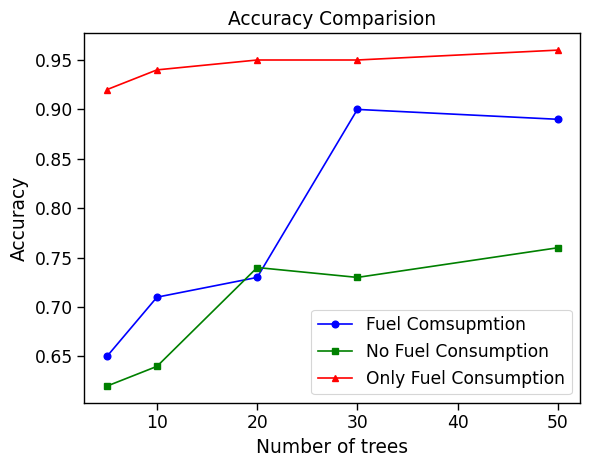

In [ ]:
plot3lines(n_estimators,accuracy_arr_fuel,n_estimators,accuracy_arr_no_fuel,n_estimators,accuracy_only_fuel,"Accuracy")

In [ ]:
weighted_avg(accuracy_arr_fuel,accuracy_arr_no_fuel,accuracy_only_fuel)

Weigthed Average Comparison: 
With fuel comsumption: 0.838696
Without fuel comsumption: 0.732174
Only fuel consumption: 0.9521739130434783


In [ ]:
pres_fuel_1 = []
pres_fuel_2 = []
pres_fuel_3 = []
pres_no_fuel_1 = []
pres_no_fuel_2 = []
pres_no_fuel_3 = []
pres_only_fuel_1 = []
pres_only_fuel_2 = []
pres_only_fuel_3 = []

for i in predictions_fuel:
    _1,_2,_3 = precision(i,y_test_fuel)
    pres_fuel_1.append(_1)
    pres_fuel_2.append(_2)
    pres_fuel_3.append(_3)

for i in predictions_no_fuel:
    _1,_2,_3 = precision(i,y_test_no_fuel)
    pres_no_fuel_1.append(_1)
    pres_no_fuel_2.append(_2)
    pres_no_fuel_3.append(_3)

for i in predictions_only_fuel:
    _1,_2,_3 = precision(i,y_test_no_fuel)
    pres_only_fuel_1.append(_1)
    pres_only_fuel_2.append(_2)
    pres_only_fuel_3.append(_3)

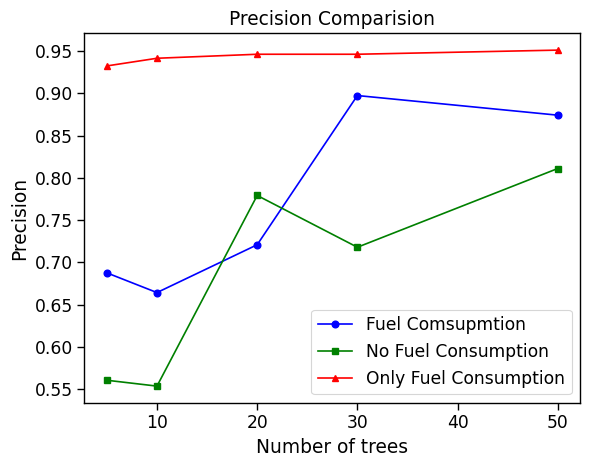

In [ ]:
average_precision_fuel = []
average_precision_no_fuel = []
average_precision_only_fuel = []
for i in range(len(n_estimators)):
    average_precision_fuel.append((pres_fuel_1[i]+pres_fuel_2[i]+pres_fuel_3[i])/3)
    average_precision_no_fuel.append((pres_no_fuel_1[i]+pres_no_fuel_2[i]+pres_no_fuel_3[i])/3)
    average_precision_only_fuel.append((pres_only_fuel_1[i]+pres_only_fuel_2[i]+pres_only_fuel_3[i])/3)

plot3lines(n_estimators,average_precision_fuel,n_estimators,average_precision_no_fuel,n_estimators,average_precision_only_fuel,"Precision")

In [ ]:
weighted_avg(average_precision_fuel,average_precision_no_fuel,average_precision_only_fuel)

Weigthed Average Comparison: 
With fuel comsumption: 0.827197
Without fuel comsumption: 0.748007
Only fuel consumption: 0.9472667979221687


In [ ]:
report_fuel = classification_report(y_test_fuel[:100], predictions_fuel[len(predictions_fuel)-1])
report_no_fuel = classification_report(y_test_fuel[:100], predictions_no_fuel[len(predictions_no_fuel)-1])
report_only_fuel = classification_report(y_test_fuel[:100], predictions_only_fuel[len(predictions_only_fuel)-1])

In [ ]:
print(report_fuel)

              precision    recall  f1-score   support

         1.0       0.88      0.78      0.82         9
         2.0       0.95      0.87      0.91        62
         3.0       0.80      0.97      0.88        29

    accuracy                           0.89       100
   macro avg       0.87      0.87      0.87       100
weighted avg       0.90      0.89      0.89       100



In [ ]:
print(report_no_fuel)

              precision    recall  f1-score   support

         1.0       1.00      0.67      0.80         9
         2.0       0.78      0.85      0.82        62
         3.0       0.65      0.59      0.62        29

    accuracy                           0.76       100
   macro avg       0.81      0.70      0.74       100
weighted avg       0.76      0.76      0.76       100



In [ ]:
print(report_only_fuel)

              precision    recall  f1-score   support

         1.0       0.90      1.00      0.95         9
         2.0       0.95      0.98      0.97        62
         3.0       1.00      0.90      0.95        29

    accuracy                           0.96       100
   macro avg       0.95      0.96      0.95       100
weighted avg       0.96      0.96      0.96       100



In [ ]:
prediction_fuel_random_forest = predictions_fuel.copy()
prediction_no_fuel_random_forest = predictions_no_fuel.copy()
prediction_only_fuel_random_forest = predictions_only_fuel.copy()

**Insights:**
<br>
For each dataset, as the number of trees increases the prediction accuracy either considerably increases or remains almost the same. This is consistent with our expectations from this algorithm it uses the law of large numbers.
<br>

Precision is defined as the ratio of number of points classified correctly as class j and the number of points predicted as class j.
The precision of all models also increases with number of trees or remains almost the same which indicates powerful classification capabilities.
<br>

We can also see that for 1 tree in the forest, the accuracy is low. This shows that for a random forest, each tree is not a good classifier but the overall forest classifies with high accuracy.
<br>

The accuracy and precision for dataset that contains only fuel consumption far exceeds the dataset with all features and dataset with fuel consumption exculded. This shows that fuel consumption of all types together can easily predict the range of $CO_2$ emmisions thus showing that the other features are not as important as fuel consumption while checking for emmissions for vehicles. This is also complemented by the fact that the accuracy for classifying data without using fuel consumption gives lower accuracy on average from the other two.  


# ***5.Kernel K-Nearest Neighbours Classifier (Research Literature)***

The Kernel K-Nearest Neighbors (Kernel KNN) algorithm is a sophisticated extension of the KNN method used for solving classification problems. It operates on the principle of leveraging similarity measures between new and existing test instances. This approach predicts the target value (label) by evaluating the proximity of the test instance to its neighbors in the training dataset, utilizing a kernel function to assess similarity and classify it into the appropriate category.


The principle of this algorithm is to identify clusters in the training data and classify the test data point in the cluster closest to it by assigning the test instance to a specific cluster based on its proximity or similarity, as determined by the chosen kernel function, facilitating accurate classification within the dataset's defined clusters.
<br>

In Kernel K-Nearest Neighbors (Kernel KNN), the use of a kernel allows for more flexible and powerful handling of the similarity measure between data points. Kernel KNN uses a kernel function to measure similarity by implicitly mapping the data into a higher-dimensional space.
The kernel function enables us to handle non-linear relationships between data points by mapping them into a higher-dimensional space which is helpful in capturing complex patterns that might not be effectively captured in the original feature space. Other advantage is that it transform data in such a way that previously non-separable classes might become more separable in the new space, potentially enhancing classification accuracy

<p align = "center"><font size="5">Algorithm Overview</font></p>
<br>

Given a dataset with labeled instances, the KNN algorithm follows a straightforward process:

1. **Choose a value for `k`:** Select the number of neighbors (`k`) that the algorithm will consider when making predictions for a new, unseen data point.

2. **Calculate distances:** For a given test instance, calculate the distance to all instances in the training dataset. Common distance metrics include Euclidean distance, Manhattan distance, or others, depending on the problem.

3. **Calculate Gaussian Kernel:** For a given test instance, compute the similarity or weight between two data points based on their Euclidean distance. We prioritize points in close proximity by giving them more significance, while reducing the importance attributed to points that are situated farther apart.

4. **Identify nearest neighbors:** Identify the `k` instances in the training dataset with the smallest distances to the test instance. These instances become the "neighbors" that influence the prediction.

5. **Make a prediction:** For classification tasks, assign the class label that is most frequent among the `k` nearest neighbors. For regression tasks, predict the average value of the target variable for the `k` nearest neighbors.
<br>

<p align = "center"><font size="5">Euclidean Distance</font></p><br>

This is the cartesian distance between the two points which are in the plane/hyperplane. Given two points $$A(a_{1}, a_{2}, a_{3}, \ldots) \quad \text{and} \quad B(b_{1}, b_{2}, b_{3}, \ldots)$$
 in an n-dimensional space, the Euclidean distance between them is given by:
$$
\text{Euclidean Distance} = \sqrt{\sum_{i=1}^{n} (a_{i} - b_{i})^2}
$$

For example, in a 3-dimensional space, the Euclidean distance:
$$
 = \sqrt{\sum_{i=1}^{n} (a_{1} - b_{1})^2 + (a_{2} - b_{2})^2 + (a_{3} - b_{3})^2}
$$
<br>

<p align = "center"><font size="5">Gaussian Kernel</font></p><br>

The Gaussian Kernel function computes the similarity or weight between two points, x and y, based on their Euclidean distance.

The formula for the Gaussian Kernel is expressed as:
<br>

$$
K(x, y) = \exp\left(-\frac{\|x - y\|^2}{2 \sigma^2}\right)
$$

$x$ and $y$ represent the data points for which the similarity is being calculated.
<br>

$\|x - y\|$ denotes the Euclidean distance between $x$ and $y$.
<br>
 $\sigma$ is a parameter known as the bandwidth that determines the width or scale of the kernel function.
<br>

<p align = "center"><font size="5"> Hyperparameter Tuning</font></p><br>

The choice of `k` is a crucial hyperparameter in KNN. A small `k` may lead to overfitting, where the model is too sensitive to noise, while a large `k` may result in underfitting, where the model oversimplifies the underlying patterns.
<br>


<p align = "center"><font size="5">Pros and Cons</font></p><br>

**Pros:**
- **Simplicity:** Kernel KNN is easy to understand and implement.
- **No Training Phase:** Kernel KNN doesn't require an explicit training phase, making it suitable for dynamic datasets.
- **Versatility:**It can be applied to a wide range of problem types.

**Cons:**
- **Computationally Expensive:** Especially for large datasets, as it involves calculating distances for each test instance.
- **Sensitivity to Noise:** Kernel KNN is sensitive to irrelevant features and noisy data.

Let 's define a function to calculate the Euclidian distance between a test point and a training point using the square root of the sum of squared differences.

In [ ]:
def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2)**2))

Let's define a function for Gaussian Kernel computation, determining the similarity between a test point and a training point. This function employs the Gaussian distribution to measure similarity, emphasizing proximity by assigning higher similarity values to nearby points.

In [ ]:
def gaussian_kernel(distance, bandwidth=1.0):
    return np.exp(-0.5 * ((distance / bandwidth) ** 2))

The ***kernel_knn_predict*** function performs the prediction using Kernel KNN for a single test point. It computes the Gaussian Kernel distances between the test point and all training points, identifies the k nearest neighbors based on the kernel distances, tallies the occurrences of each class, and makes a prediction by selecting the class with the highest count among the neighbors.

In [ ]:
def kernel_knn_predict(train_data, train_target, test_point, k, bandwidth=1.0):
    distances = []
    for i, train_instance in enumerate(train_data):
        dist = euclidean_distance(test_point, train_instance)
        distances.append((dist, train_target[i]))
    distances.sort(key=lambda x: x[0])
    neighbors = distances[:k]
    weights = [gaussian_kernel(neighbor[0], bandwidth=bandwidth) for neighbor in distances[:k]]
    weighted_votes = {}
    for i, (dist, label) in enumerate(distances[:k]):
        if label not in weighted_votes:
            weighted_votes[label] = 0
        weighted_votes[label] += weights[i]
    predicted_class = max(weighted_votes, key=weighted_votes.get)

    return predicted_class

In [ ]:
def kernel_knn_predict_batch(train_data, train_target, test_data, k, bandwidth=1.0):
    predictions = []
    for test_point in test_data:
        prediction = kernel_knn_predict(train_data, train_target, test_point, k, bandwidth=bandwidth)
        predictions.append(prediction)

    return np.array(predictions)

In [ ]:
X_train_fuel = training_data_fuel[:,:training_data_fuel.shape[1]-1]
y_train_fuel = training_data_fuel[:,training_data_fuel.shape[1]-1]

In [ ]:
X_test_fuel = test_data_fuel[:,:test_data_fuel.shape[1]-1]
y_test_fuel = test_data_fuel[:,test_data_fuel.shape[1]-1]

In [ ]:
X_train_no_fuel = training_data_no_fuel[:,:training_data_no_fuel.shape[1]-1]
y_train_no_fuel = training_data_no_fuel[:,training_data_no_fuel.shape[1]-1]

In [ ]:
X_test_no_fuel = test_data_no_fuel[:,:test_data_no_fuel.shape[1]-1]
y_test_no_fuel = test_data_no_fuel[:,test_data_no_fuel.shape[1]-1]

In [ ]:
only_fuel_data_copy = only_fuel_data.copy()
split = int(0.75*only_fuel_data_copy.shape[0])
training_data_only_fuel_copy, test_data_only_fuel_copy = only_fuel_data_copy[:split,:], only_fuel_data_copy[split:,:]

In [ ]:
predictions_fuel = []
predictions_no_fuel = []
predictions_only_fuel = []
k_values = [1,2,5,10]
accuracy_fuel = []
accuracy_no_fuel = []
accuracy_only_fuel = []

In [ ]:
for k in k_values:
  predictions = kernel_knn_predict_batch(X_train_fuel[:3000], y_train_fuel[:3000], X_test_fuel[:1000], k)
  accuracy_fuel.append(accuracy(predictions,y_test_fuel))
  predictions_fuel.append(predictions)


In [ ]:
for k in k_values:
  predictions = kernel_knn_predict_batch(X_train_no_fuel[:3000], y_train_no_fuel[:3000], X_test_no_fuel[:1000], k)
  accuracy_no_fuel.append(accuracy(predictions,y_test_no_fuel))
  predictions_no_fuel.append(predictions)


In [ ]:
for k in k_values:
  predictions =  kernel_knn_predict_batch(training_data_only_fuel_copy[:3000], y_train_fuel[:3000], test_data_only_fuel_copy[:1000], k)
  accuracy_only_fuel.append(accuracy(predictions,y_test_fuel))
  predictions_only_fuel.append(predictions)


In [ ]:
def accuracy(predictions,y_test):
    acc = 0
    for i,val in enumerate(predictions):
        if(val==y_test[i]):
            acc = acc+1
    acc = acc/len(predictions)
    return acc

In [ ]:
def plot3lines(x1,y1,x2,y2,x3,y3,label):
    plt.plot(x1, y1, label='Fuel Comsupmtion', color='blue', marker='o')

    plt.plot(x2,y2, label='No Fuel Consumption', color='green', marker='s')

    plt.plot(x3,y3, label='Only Fuel Consumption', color='red', marker='^')

    plt.xlabel('K')
    plt.ylabel(label)
    plt.title(label+' Comparision')
    plt.legend()
    plt.show()

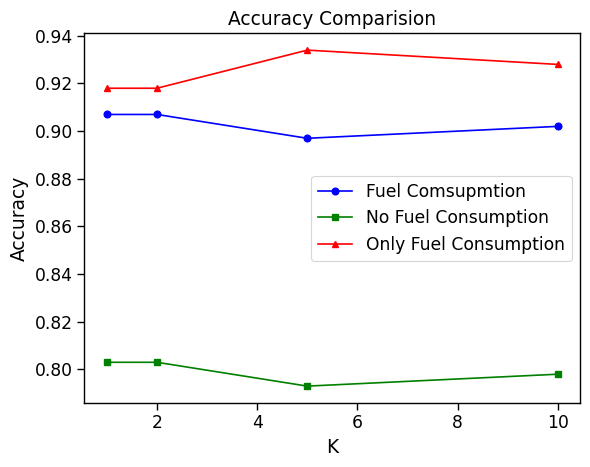

In [ ]:
plot3lines(k_values,accuracy_fuel,k_values,accuracy_no_fuel,k_values,accuracy_only_fuel,"Accuracy")

In [ ]:
report_fuel = classification_report(y_test_fuel[:1000], predictions_fuel[len(predictions_fuel)-1])
report_no_fuel = classification_report(y_test_fuel[:1000], predictions_no_fuel[len(predictions_no_fuel)-1])
report_only_fuel = classification_report(y_test_fuel[:1000], predictions_only_fuel[len(predictions_only_fuel)-1])

In [ ]:
print(report_fuel)

              precision    recall  f1-score   support

         1.0       0.86      0.93      0.90       230
         2.0       0.90      0.91      0.90       508
         3.0       0.95      0.86      0.90       262

    accuracy                           0.90      1000
   macro avg       0.90      0.90      0.90      1000
weighted avg       0.90      0.90      0.90      1000



In [ ]:
print(report_no_fuel)

              precision    recall  f1-score   support

         1.0       0.74      0.82      0.78       230
         2.0       0.80      0.81      0.80       508
         3.0       0.87      0.76      0.81       262

    accuracy                           0.80      1000
   macro avg       0.80      0.80      0.80      1000
weighted avg       0.80      0.80      0.80      1000



In [ ]:
print(report_only_fuel)

              precision    recall  f1-score   support

         1.0       0.92      1.00      0.96       230
         2.0       0.92      0.94      0.93       508
         3.0       0.94      0.85      0.90       262

    accuracy                           0.93      1000
   macro avg       0.93      0.93      0.93      1000
weighted avg       0.93      0.93      0.93      1000



In [ ]:
prediction_only_fuel_knn = predictions_only_fuel.copy()
prediction_fuel_knn = predictions_fuel.copy()
prediction_no_fuel_knn = predictions_no_fuel.copy()

# ***6. Insights: Best Car Models***

In [ ]:
def getBestCars(cars,y_pred):
  best_cars = set()
  for i,val in enumerate(y_pred):
    if(val==1):
      best_cars.add(cars[i])
  return best_cars

In [ ]:
best_cars_mlp_fuel = getBestCars(car_models,prediction_fuel_mlp[len(prediction_fuel_mlp)-1])
best_cars_naive_bayes_fuel = getBestCars(car_models,prediction_fuel_naive_bayes)
best_cars_knn_fuel = getBestCars(car_models,prediction_fuel_knn[len(prediction_fuel_knn)-1])
best_cars_random_forest_fuel = getBestCars(car_models,prediction_fuel_random_forest[len(prediction_fuel_random_forest)-1])
all_cars_fuel = set.union(best_cars_mlp_fuel,best_cars_naive_bayes_fuel,best_cars_knn_fuel,best_cars_random_forest_fuel)
print("Best Cars predicted using all features: ")
for  u in all_cars_fuel:
  print(u)

Best Cars predicted using all features: 
Civic Coupe
Boxster S
Beetle Dune Convertible
John Cooper Works Convertible
A 220 4MATIC
Colorado
Cherokee
NX 300 AWD F SPORT
E-PACE P250
911 Turbo
Nautilus
AMG GT 53 4MATIC+ Coupe
Odyssey
Range Rover 3.0
G70
Wrangler JL Unlimited 4X4
Sierra WT
Discovery Sport P250
Rogue
John Cooper Works Clubman ALL4
Q70 AWD
RC F
Explorer FFV AWD
911 Targa 4
TTS Coupe
SL 550
Beetle Convertible
AMG S 63 4MATIC+
Enclave AWD
Sonata Hybrid SE
CLS 450 4MATIC
AMG E 53 4MATIC+ Wagon
A6 allroad
911 Carrera 4 GTS Cabriolet
F-PACE 30t
XE 25t AWD
Grand Cherokee 4X4
Highlander AWD (Start/Stop System)
Corolla XSE
RVR
Civic Hatchback Sport
Niro
Golf GTI
Journey FFV
EcoSport AWD
CTS AWD
Cooper S Convertible
AMG E 53 4MATIC+ Coupe
Cooper S Countryman ALL4
M4 Coupe
S5 Sportback
Range Rover Evoque P250
A5 Cabriolet quattro
Cooper Countryman ALL4
Ridgeline AWD
Nautilus AWD
Boxster
Mirage
Range Rover Velar P300
Tucson AWD
911 Turbo Cabriolet
Cruze Premier
Macan
X5 xDrive40i
Sporta

In [ ]:
best_cars_mlp_no_fuel = getBestCars(car_models,prediction_no_fuel_mlp[len(prediction_no_fuel_mlp)-1])
best_cars_naive_bayes_no_fuel = getBestCars(car_models,prediction_no_fuel_naive_bayes)
best_cars_knn_no_fuel = getBestCars(car_models,prediction_no_fuel_knn[len(prediction_no_fuel_knn)-1])
best_cars_random_forest_no_fuel = getBestCars(car_models,prediction_no_fuel_random_forest[len(prediction_no_fuel_random_forest)-1])
all_cars_no_fuel = set.union(best_cars_mlp_no_fuel,best_cars_naive_bayes_no_fuel,best_cars_knn_no_fuel,best_cars_random_forest_no_fuel)
print("Best Cars predicted without considering fuel consumption: ")
for  u in all_cars_no_fuel:
  print(u)

Best Cars predicted without considering fuel consumption: 
Civic Coupe
Ghibli S Q4
Boxster S
Beetle Dune Convertible
John Cooper Works Convertible
911 GT2 RS
A 220 4MATIC
Colorado
Cherokee
NX 300 AWD F SPORT
E-PACE P250
911 Turbo
Nautilus
AMG GT 53 4MATIC+ Coupe
Odyssey
G70
Wrangler JL Unlimited 4X4
Sierra WT
Discovery Sport P250
Rogue
John Cooper Works Clubman ALL4
Q70 AWD
Explorer FFV AWD
911 Targa 4
SL 550
Beetle Convertible
AMG S 63 4MATIC+
Enclave AWD
Sonata Hybrid SE
CLS 450 4MATIC
AMG E 53 4MATIC+ Wagon
A6 allroad
911 Carrera 4 GTS Cabriolet
F-PACE 30t
XE 25t AWD
Grand Cherokee 4X4
Highlander AWD (Start/Stop System)
Corolla XSE
RVR
Giulia
Civic Hatchback Sport
Niro
Golf GTI
Journey FFV
Corvette ZR1
EcoSport AWD
911 Turbo S Exclusive Cabriolet
CTS AWD
Cooper S Convertible
AMG E 53 4MATIC+ Coupe
Cooper S Countryman ALL4
M4 CS
XE P250 AWD
M4 Coupe
S5 Sportback
Range Rover Evoque P250
230i Cabriolet
Cooper Countryman ALL4
Ridgeline AWD
Nautilus AWD
Boxster
M5 Competition
Range Rover

In [ ]:
best_cars_mlp_only_fuel = getBestCars(car_models,prediction_only_fuel_mlp[len(prediction_only_fuel_mlp)-1])
best_cars_naive_bayes_only_fuel = getBestCars(car_models,prediction_only_fuel_naive_bayes)
best_cars_knn_only_fuel = getBestCars(car_models,prediction_only_fuel_knn[len(prediction_only_fuel_knn)-1])
best_cars_random_forest_only_fuel = getBestCars(car_models,prediction_only_fuel_random_forest[len(prediction_only_fuel_random_forest)-1])
all_cars_only_fuel = set.union(best_cars_mlp_only_fuel,best_cars_naive_bayes_only_fuel,best_cars_knn_only_fuel,best_cars_random_forest_only_fuel)
print("Best Cars predicted considering fuel consumption alone: ")
for  u in all_cars_only_fuel:
  print(u)

Best Cars predicted considering fuel consumption alone: 
Civic Coupe
Boxster S
Beetle Dune Convertible
John Cooper Works Convertible
A 220 4MATIC
Colorado
Cherokee
NX 300 AWD F SPORT
E-PACE P250
911 Turbo
Nautilus
AMG GT 53 4MATIC+ Coupe
Odyssey
Range Rover 3.0
G70
Wrangler JL Unlimited 4X4
Sierra WT
Discovery Sport P250
Rogue
John Cooper Works Clubman ALL4
Q70 AWD
RC F
911 Targa 4
TTS Coupe
SL 550
Beetle Convertible
AMG S 63 4MATIC+
Enclave AWD
Sonata Hybrid SE
CLS 450 4MATIC
AMG E 53 4MATIC+ Wagon
A6 allroad
911 Carrera 4 GTS Cabriolet
F-PACE 30t
XE 25t AWD
Grand Cherokee 4X4
Highlander AWD (Start/Stop System)
Corolla XSE
RVR
Giulia
Civic Hatchback Sport
Niro
Golf GTI
Journey FFV
EcoSport AWD
CTS AWD
Cooper S Convertible
AMG E 53 4MATIC+ Coupe
Cooper S Countryman ALL4
XE P250 AWD
M4 Coupe
S5 Sportback
Range Rover Evoque P250
A5 Cabriolet quattro
230i Cabriolet
Cooper Countryman ALL4
Ridgeline AWD
Nautilus AWD
Boxster
Mirage
Range Rover Velar P300
Tucson AWD
911 Turbo Cabriolet
Cruze 



# **Classification report**
A classification report is a useful tool for evaluating the performance of a classification model. It provides several metrics that help you understand how well your model is performing on different aspects. The most common metrics included in a classification report are precision, recall, F1-score, and support. Here's how to interpret these metrics:

## **1) Precision:**

Precision is the ratio of correctly predicted positive observations to the total predicted positives.
It measures the accuracy of the positive predictions. A high precision indicates that the model has fewer false positives.
Precision is calculated as:

$$
\text{Precision} = \frac{\text{True Positives}}{\text{True Positives + False Positives}}
$$

​
## **Recall (Sensitivity or True Positive Rate):**


Recall is the ratio of correctly predicted positive observations to the all observations in actual class.
It measures the ability of the model to capture all the possible positive instances. A high recall indicates that the model has fewer false negatives.
Recall is calculated as:

$$
\text{Recall} = \frac{\text{True Positives}}{\text{True Positives + False Negatives}}
$$

​

## **F1-Score:**

F1-score is the weighted average of precision and recall. It combines both precision and recall into a single metric.
It is especially useful when there is an uneven class distribution (e.g., imbalanced datasets).
F1-score is calculated as:

$$
\text{F1-Score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision + Recall}}
$$
​

## **Support:**

Support is the number of actual occurrences of the class in the specified dataset.
It provides context to the precision and recall values by indicating the number of actual instances of each class.



<font size="6"> **Insights**</font>
<br>

### *Multilayer Perceptron:*

Accuracy: 0.98
<br>
Precision: 0.98
<br>
Recall: 0.98
<br>
F1 Score: 0.98
<br>


Insights:
The MLP model with fuel features appears to perform very well with high accuracy, precision, recall, and F1 score.

### *Naive Bayes:*

Accuracy (All Features):  0.84<br>
Accuracy (Excluding Fuel Consumption):  0.71<br>
Accuracy (Only Fuel Consumption):  0.91<br>
Insights:
The Naive Bayes model performs reasonably well, with the highest accuracy achieved when considering only fuel consumption.
Excluding fuel consumption as a feature leads to a drop in accuracy.

### *Random Forest:*
Accuracy: 0.89 <br>
Insights:
The Random Forest model performs well with high precision and recall for each class.
The model seems to handle class 2.0 better than the other classes.


### *Kernel KNN:*
Accuracy: 0.90
<br>
Insights:
The Kernal K-Nearest Neighbours model performs well across all classes with balanced precision, recall, and F1-score.
The model achieves an accuracy of 90%, indicating robust performance.
<br><br>

## **Conclusion :**
The MLP model with fuel features stands out with exceptionally high accuracy, precision, recall, and F1 score.
Random Forest and K-Nearest Neighbours also show good performance, with the latter achieving a slightly higher accuracy.
The Naive Bayes model performs reasonably well, especially when considering only fuel consumption. Excluding fuel features leads to a decrease in accuracy.

# **_7. References_**
Principal Componenet Analysis:

https://machinelearningmastery.com/principal-components-analysis-for-dimensionality-reduction-in-python/
<br>

Feature Selection:

https://machinelearningmastery.com/feature-selection-with-real-and-categorical-data/
<br>

Law of Large Numbers and Random Forests:
<br>

https://www.math.ucdavis.edu/~tracy/courses/math135A/UsefullCourseMaterial/lawLargeNo.pdf
<br>
https://www.researchgate.net/publication/226379698_Strong_laws_of_large_numbers_for_random_forests
<br>

Entropy and Information Gain:

https://machinelearningmastery.com/information-gain-and-mutual-information/

https://stats.stackexchange.com/questions/87182/what-is-the-role-of-the-logarithm-in-shannons-entropy

https://towardsdatascience.com/decision-trees-explained-entropy-information-gain-gini-index-ccp-pruning-4d78070db36c?gi=df2e2752d6a9
<br>

Multi-layered Perceptron

https://machinelearningmastery.com/neural-networks-crash-course/
<br>

Kernel KNN:

https://crystal.uta.edu/~gonzalez/ml/Kernel_Nearest_Neighbor_Algorithm.pdf

https://towardsdatascience.com/make-your-knn-smooth-with-gaussian-kernel-7673fceb26b9

S. Sun and Y. Wang, "K-Nearest Neighbor Clustering Algorithm Based on Kernel Methods," 2010 Second WRI Global Congress on Intelligent Systems, Wuhan, China, 2010, pp. 335-338, doi: 10.1109/GCIS.2010.272. https://ieeexplore.ieee.org/document/5709388

Yu, K., Ji, L. & Zhang, X. Kernel Nearest-Neighbor Algorithm. Neural Processing Letters 15, 147–156 (2002). https://doi.org/10.1023/A:1015244902967

